# importado de Librerias

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

# Definición de funciones auxiliares

In [2]:

def ref_leer_componentes(atomo):
    '''     
    atomo : Linea de texto proveniente de un archivo refstructureFF.out de donde se extraen las componentes cartesinas a una lista [x,y,z].
    '''
    return  [float(atomo.split()[0]), float(atomo.split()[1]), float(atomo.split()[2])]


def read_trajs(path : str) -> dict:
    '''
    Esta funcion lee la direccion con las salidas de la dinamica molecular (concatenada) y las guarda en un diccionario.
    '''
    df = {}
    dfs = []
    sticks = ['traj_stick.out', 'traj_stickearly.out', 'traj_sticklate.out']
    for stick in sticks:    
        if os.path.getsize(path + stick) > 0:
            dfs.append(pd.read_csv(path + stick, delim_whitespace=True, header=None))
    if len(dfs) == 0:
        df['stick'] = dfs[0]
    if len(dfs) > 0:
        df['stick'] = pd.concat(dfs, ignore_index=True)
    del(dfs)
    df['stick'].columns = ['ncoup', 'nt', 't', 'nreb', 'nsubh', 'ptad', 'V']
    df['stick'] = df['stick'].sort_values(by='ncoup')
    df['stick'].columns = ['ncoup', 'nt', 't', 'nreb', 'nsubh', 'ptad', 'V']

    df['admol'] = pd.read_csv(path + 'traj_admol.out', delim_whitespace=True, header=None)
    df['admol'].columns = ['ncoup','nt','t','rmax','V','vint']
    df['refl'] = pd.read_csv(path + 'traj_refl.out', delim_whitespace=True, header=None)
    df['refl'].columns = ['ncoup','nt','t','nreb','V','tlf'] 
    return df

def read_CMs(path : str) -> dict:
    '''
    Esta funcion lee la direccion con las salidas de la dinamica molecular (concatenada) y las guarda en un diccionario.
    '''
    df = {}
    dfs = []
    sticks = ['traj_stick.out', 'traj_stickearly.out', 'traj_sticklate.out']
    for stick in sticks:    
        if os.path.getsize(path + stick) > 0:
            dfs.append(pd.read_csv(path + stick))
    if len(dfs) == 0:
        df['stick'] = dfs[0]
    if len(dfs) > 0:
        df['stick'] = pd.concat(dfs, ignore_index=True)
    del(dfs)
    df['admol'] = pd.read_csv(path + 'traj_admol.out')
    df['refl'] = pd.read_csv(path + 'traj_refl.out')

    return df


# Lectura de datos

In [3]:
Pt_ref = {}
with open('data/refstructureFF.out') as f:
            ref = f.readlines()


for i in range(3,54):
    Pt_ref[str(i-2)] =  ref_leer_componentes(ref[i])    

In [4]:
path50 = 'data/0/1-concat/'
path300 = 'data/0/1-concat/'
path550 = 'data/0/1-concat/'
energias =  ['Ei0.6_outputs/', 'Ei1.0_outputs/', 'Ei1.4_outputs/']

conf_files = ['config_admol.xyz',
'config_refl.xyz',
'config_stick.xyz',
'config_stickearly.xyz',
'config_sticklate.xyz']


energias =  ['Ei0.6_outputs/','Ei1.0_outputs/','Ei1.4_outputs/']
trajs50 = {}
trajs300 = {}
trajs550 = {}
for Ei in energias:
    trajs50[str(Ei[2:5])] = read_trajs(path50+Ei)
    trajs300[str(Ei[2:5])] = read_trajs(path300+Ei)
    trajs550[str(Ei[2:5])] = read_trajs(path550+Ei)
E_incidencia = [ '0.6', '1.0', '1.4']

E_incidencia2 = ['0_6','1_0','1_4']
tipo_traj = ['stick', 'admol', 'refl']


In [5]:
def read_CMs(path : str, file : str) -> dict:
    '''
    Esta funcion lee la direccion con ... las guarda en un diccionario.
    '''
    df = {}
    dfs = []
    sticks = [f'{file}_stick_CH4_cm.out', f'{file}_stickearly_CH4_cm.out', f'{file}_sticklate_CH4_cm.out']
    for stick in sticks:
        if not os.path.exists(path + stick):
            print(f"El archivo '{stick}' no existe en la ubicación '{path}'")
            pass    
        elif os.path.getsize(path + stick) > 0:
            dfs.append(pd.read_csv(path + stick))
    if len(dfs) == 0:
        df['stick'] = dfs[0]
    if len(dfs) > 0:
        df['stick'] = pd.concat(dfs, ignore_index=True)
    del(dfs)
    df['admol'] = pd.read_csv(path + f'{file}_admol_CH4_cm.out')
    df['refl'] = pd.read_csv(path + f'{file}_refl_CH4_cm.out')

    return df

def read_dPt(path : str, file : str) -> dict:
    '''
    Esta funcion lee la direccion con ... las guarda en un diccionario.
    '''
    df = {}
    dfs = []
    sticks = [f'{file}_stick_dPt.out', f'{file}_stickearly_dPt.out', f'{file}_sticklate_dPt.out']
    for stick in sticks:
        if not os.path.exists(path + stick):
            print(f"El archivo '{stick}' no existe en la ubicación '{path}'")
            pass    
        elif os.path.getsize(path + stick) > 0:
            dfs.append(pd.read_csv(path + stick))
    if len(dfs) == 0:
        df['stick'] = dfs[0]
    if len(dfs) > 0:
        df['stick'] = pd.concat(dfs, ignore_index=True)
    del(dfs)
    df['admol'] = pd.read_csv(path + f'{file}_admol_dPt.out')
    df['refl'] = pd.read_csv(path + f'{file}_refl_dPt.out')

    return df

In [9]:
!ls $path50$E_path

0K_0_6_CH4_cm.out
0K_0_6_dPt.out
config_admol.xyz
config_admol_ini.xyz
config_refl.xyz
config_refl_bottom.xyz
config_refl_ini.xyz
config_stick.xyz
config_stick_ini.xyz
config_stick_vmax.xyz
config_sticklate.xyz
config_sticklate_ini.xyz
config_sticklate_vmax.xyz
traj_admol.out
traj_probl.out
traj_refl.out
traj_stick.out
traj_stickearly.out
traj_sticklate.out
traj_stickpat.out
traj_zstop.out


In [7]:
CMs50 = {}
CMs300 = {}
CMs550 = {}


for Ei,E_path in zip(E_incidencia2, energias):
    file = '0K_'+ Ei
    CMs50[Ei] = read_CMs(path50+E_path,file)

for Ei,E_path in zip(E_incidencia2, energias):
    file = '0K_'+ Ei
    CMs300[Ei] = read_CMs(path300+E_path,file)

for Ei,E_path in zip(E_incidencia2, energias):
    file = '0K_'+ Ei
    CMs550[Ei] = read_CMs(path550+E_path,file)

El archivo '0K_0_6_stick_CH4_cm.out' no existe en la ubicación 'data/0/1-concat/Ei0.6_outputs/'
El archivo '0K_0_6_stickearly_CH4_cm.out' no existe en la ubicación 'data/0/1-concat/Ei0.6_outputs/'
El archivo '0K_0_6_sticklate_CH4_cm.out' no existe en la ubicación 'data/0/1-concat/Ei0.6_outputs/'


IndexError: list index out of range

In [ ]:
# Inicializa una lista para almacenar los DataFrames
data_frames = []

# Itera por los nombres de los diccionarios y sus respectivas temperaturas
for name, temperature in [('CMs50', 0)]:
    # Obtiene el diccionario correspondiente
    cm_dict = globals()[name]
    
    # Inicializa listas para almacenar los datos
    ei_values = []
    kind_values = []
    data_values = []

    # Itera por las claves del primer nivel ('0_4', '0_6', '0_8', '1_0', '1_2', '1_4')
    for ei_key in ['0_6', '1_0', '1_4']:
        ei = ei_key
        # Itera por las claves del segundo nivel ('stick', 'admol', 'refl')
        for kind_key in ['stick', 'admol', 'refl']:
            kind = kind_key
            # Accede a los datos correspondientes del diccionario anidado y agrega 'Ei', 'kind', y 'T'
            data = cm_dict[ei_key][kind_key]
            data['Ei'] = ei
            data['kind'] = kind
            data['T'] = temperature
            # Agrega los valores a las listas
            data_values.append(data)

    # Concatena los DataFrames internos en un solo DataFrame y agrega a la lista de DataFrames
    df = pd.concat(data_values, ignore_index=True)
    data_frames.append(df)

# Concatena los DataFrames de los diferentes diccionarios en un solo DataFrame
CMs = pd.concat(data_frames, ignore_index=True)
CMs = CMs.assign(
    dx = CMs.x - CMs.x_ini,
    dy = CMs.y - CMs.y_ini,
    dz = CMs.z - CMs.z_ini
)
CMs['Ei'] = CMs.Ei.replace('_','.', regex=True)
CMs=CMs.sort_values(by=['T','Ei','ntraj'])


In [ ]:
CMs

ntraj          x          y         z     x_ini     y_ini     z_ini   
8           1  -7.573463  -3.829627  3.856871  1.950330  0.114865  9.000000  \
9           2  11.976364   4.553305  4.918196  7.984705  4.129872  8.999737   
10          3  12.835998   7.025249  3.283637  7.498847  7.571687  9.000016   
11          4  -9.176993   7.262731  1.601437  1.498144  6.273883  9.000144   
12          5  14.295663  12.107242  4.228211  5.131917  7.745245  8.999761   
...       ...        ...        ...       ...       ...       ...       ...   
181289   9996  17.818435   4.767102  9.003729  6.437670  4.634307  9.000334   
181290   9997  -3.261758   5.610640  9.003780  0.462218  5.943855  8.999683   
181291   9998  13.786411   2.568372  9.000945  6.943400  2.969842  8.999883   
181292   9999   9.585734   1.113925  9.005288  4.736681  0.024274  9.000278   
181293  10000  -1.228506   5.948180  9.000499  0.183376  6.701350  9.000070   

         Ei   kind    T         dx        dy        dz  
8       0.4  admol   50  -9.523792 -3.944492 -5.143129  
9       0.4  admol   50   3.991659  0.423433 -4.081541  
10      0.4  admol   50   5.337150 -0.546438 -5.716380  
11      0.4  admol   50 -10.675137  0.988848 -7.398707  
12      0.4  admol   50   9.163747  4.361997 -4.771550  
...     ...    ...  ...        ...       ...       ...  
181289  1.4   refl  550  11.380765  0.132796  0.003395  
181290  1.4   refl  550  -3.723977 -0.333216  0.004097  
181291  1.4   refl  550   6.843011 -0.401470  0.001062  
181292  1.4   refl  550   4.849054  1.089651  0.005010  
181293  1.4   refl  550  -1.411882 -0.753170  0.000429  

[181294 rows x 13 columns]

In [ ]:
dPt50 = {}
dPt300 = {}
dPt550 = {}


for Ei,E_path in zip(E_incidencia2, energias):
    file = '50K_'+ Ei
    dPt50[Ei] = read_dPt(path50+E_path,file)

for Ei,E_path in zip(E_incidencia2, energias):
    file = '300K_'+ Ei
    dPt300[Ei] = read_dPt(path300+E_path,file)

for Ei,E_path in zip(E_incidencia2, energias):
    file = '550K_'+ Ei
    dPt550[Ei] = read_dPt(path550+E_path,file)

El archivo '50K_0_4_stickearly_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/50Koutputs/Ei0.4_outputs/'


El archivo '50K_0_6_stickearly_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/50Koutputs/Ei0.6_outputs/'
El archivo '50K_0_8_stickearly_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/50Koutputs/Ei0.8_outputs/'
El archivo '50K_1_0_stickearly_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/50Koutputs/Ei1.0_outputs/'
El archivo '50K_1_2_stickearly_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/50Koutputs/Ei1.2_outputs/'
El archivo '50K_1_4_stickearly_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/50Koutputs/Ei1.4_outputs/'
El archivo '300K_0_4_stickearly_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/300Koutputs/Ei0.4_outputs/'
El archivo '300K_0_4_sticklate_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/300Koutputs/Ei0.4_outputs/'
El archivo '300K_0_6_stickearly_dPt.out' no existe en la ubicación 'data/01 - NN15 concat MD/300Koutputs/Ei0.6_outputs/'
El archivo '300K_0_8_stickearly_dPt.out' no

In [ ]:
dPt550['0_4']['stick']

ntraj  nat        dx        dy        dz
0      540   31  0.037321 -0.011414 -0.070543
1      540   32  0.020697 -0.051536 -0.067374
2      540   33  0.017050 -0.095423 -0.197891
3      540   34  0.004114 -0.141194  0.010440
4      540   35  0.233516 -0.017805  0.059852
..     ...  ...       ...       ...       ...
289   6727   47  0.223031 -0.342960 -0.073000
290   6727   48  0.190714 -0.300947 -0.006634
291   6727   49  0.129371 -0.453102  0.235091
292   6727   50  0.080452 -0.261796  0.199290
293   6727   51  0.298286 -0.396423  0.393371

[294 rows x 5 columns]

In [ ]:
# Inicializa una lista para almacenar los DataFrames
data_frames = []

# Itera por los nombres de los diccionarios y sus respectivas temperaturas
for name, temperature in [('dPt50', 50), ('dPt300', 300), ('dPt550', 550)]:
    # Obtiene el diccionario correspondiente
    pt_dict = globals()[name]
    
    # Inicializa listas para almacenar los datos
    ei_values = []
    kind_values = []
    data_values = []

    # Itera por las claves del primer nivel ('0_4', '0_6', '0_8', '1_0', '1_2', '1_4')
    for ei_key in ['0_4', '0_6', '0_8', '1_0', '1_2', '1_4']:
        ei = ei_key
        # Itera por las claves del segundo nivel ('stick', 'admol', 'refl')
        for kind_key in ['stick', 'admol', 'refl']:
            kind = kind_key
            # Accede a los datos correspondientes del diccionario anidado y agrega 'Ei', 'kind', y 'T'
            data = pt_dict[ei_key][kind_key]
            data['Ei'] = ei
            data['kind'] = kind
            data['T'] = temperature
            # Agrega los valores a las listas
            data_values.append(data)

    # Concatena los DataFrames internos en un solo DataFrame y agrega a la lista de DataFrames
    df = pd.concat(data_values, ignore_index=True)
    data_frames.append(df)

# Concatena los DataFrames de los diferentes diccionarios en un solo DataFrame
dPt = pd.concat(data_frames, ignore_index=True)

dPt['Ei'] = dPt.Ei.replace('_', '.', regex=True)



In [ ]:
dPt

ntraj  nat        dx        dy        dz   Ei   kind    T
0         2321   31  0.057324 -0.029630 -0.014623  0.4  stick   50
1         2321   32  0.038994 -0.050930 -0.024849  0.4  stick   50
2         2321   33  0.058371 -0.033094 -0.046881  0.4  stick   50
3         2321   34  0.006967 -0.054592 -0.011560  0.4  stick   50
4         2321   35  0.022585  0.006333 -0.010755  0.4  stick   50
...        ...  ...       ...       ...       ...  ...    ...  ...
3807169  10000   47  0.112930 -0.185896  0.205751  1.4   refl  550
3807170  10000   48  0.074581 -0.187840  0.225012  1.4   refl  550
3807171  10000   49  0.188025 -0.343139  0.044588  1.4   refl  550
3807172  10000   50  0.085309 -0.095192 -0.059902  1.4   refl  550
3807173  10000   51  0.084026 -0.108019  0.261818  1.4   refl  550

[3807174 rows x 8 columns]

In [ ]:
# Supongamos que tienes los diccionarios 'trajs50', 'trajs300' y 'trajs550'
trajs_dicts = {'trajs50': trajs50, 'trajs300': trajs300, 'trajs550': trajs550}

# Inicializa una lista para almacenar los DataFrames
data_frames = []

# Itera por los nombres de los diccionarios y sus respectivas temperaturas
for name, temperature in [('trajs50', 50), ('trajs300', 300), ('trajs550', 550)]:
    # Obtiene el diccionario correspondiente
    trajs_dict = trajs_dicts[name]
    
    # Inicializa listas para almacenar los datos
    ei_values = []
    kind_values = []
    data_values_trajs = []

    # Itera por las claves del primer nivel ('0.4', '0.6', '0.8', '1.0', '1.2', '1.4')
    for ei_key, ei_data in trajs_dict.items():
        ei = ei_key
        # Itera por las claves del segundo nivel ('stick')
        for kind_key in ['stick']:
            kind = kind_key
            # Accede a los datos correspondientes del diccionario anidado y agrega 'Ei', 'kind' y 'T'
            data = trajs_dict[ei_key][kind_key]
            data['Ei'] = ei
            data['kind'] = kind
            data['T'] = temperature
            # Agrega los valores a las listas
            data_values_trajs.append(data)

    # Concatena los DataFrames internos en un solo DataFrame y agrega a la lista de DataFrames
    df = pd.concat(data_values_trajs, ignore_index=True)
    data_frames.append(df)

# Concatena los DataFrames de los diferentes diccionarios en un solo DataFrame
trajs_all_stick = pd.concat(data_frames, ignore_index=True)

# Ahora tienes un DataFrame 'trajs_all' con las columnas 'Ei', 'kind', 'T' y los datos correspondientes.


In [ ]:
# Supongamos que tienes los diccionarios 'trajs50', 'trajs300' y 'trajs550'
trajs_dicts = {'trajs50': trajs50, 'trajs300': trajs300, 'trajs550': trajs550}

# Inicializa una lista para almacenar los DataFrames
data_frames = []

# Itera por los nombres de los diccionarios y sus respectivas temperaturas
for name, temperature in [('trajs50', 50), ('trajs300', 300), ('trajs550', 550)]:
    # Obtiene el diccionario correspondiente
    trajs_dict = trajs_dicts[name]
    
    # Inicializa listas para almacenar los datos
    ei_values = []
    kind_values = []
    data_values_trajs = []

    # Itera por las claves del primer nivel ('0.4', '0.6', '0.8', '1.0', '1.2', '1.4')
    for ei_key, ei_data in trajs_dict.items():
        ei = ei_key
        # Itera por las claves del segundo nivel ('stick')
        for kind_key in ['refl']:
            kind = kind_key
            # Accede a los datos correspondientes del diccionario anidado y agrega 'Ei', 'kind' y 'T'
            data = trajs_dict[ei_key][kind_key]
            data['Ei'] = ei
            data['kind'] = kind
            data['T'] = temperature
            # Agrega los valores a las listas
            data_values_trajs.append(data)

    # Concatena los DataFrames internos en un solo DataFrame y agrega a la lista de DataFrames
    df = pd.concat(data_values_trajs, ignore_index=True)
    data_frames.append(df)

# Concatena los DataFrames de los diferentes diccionarios en un solo DataFrame
trajs_all_refl = pd.concat(data_frames, ignore_index=True)

# Ahora tienes un DataFrame 'trajs_all' con las columnas 'Ei', 'kind', 'T' y los datos correspondientes.


In [ ]:
trajs_all_stick

ncoup    nt       t  nreb  nsubh  ptad         V   Ei   kind    T
0      2321  1510  0.3018     0      4    51  0.935684  0.4  stick   50
1      3384  1502  0.3002     0      4    49  1.049950  0.4  stick   50
2      3525  1610  0.3218     1      4    51  1.337092  0.4  stick   50
3      3611  1535  0.3068     0      1    49  1.287614  0.4  stick   50
4      5257  1504  0.3006     0      4    51  0.955718  0.4  stick   50
...     ...   ...     ...   ...    ...   ...       ...  ...    ...  ...
8245   9966   998  0.1994     1      4    51  3.587370  1.4  stick  550
8246   9980   895  0.1788     1      1    50  3.367813  1.4  stick  550
8247   9988   907  0.1812     0      3    49  3.354040  1.4  stick  550
8248   9993  1000  0.1998     1      2    50  2.708475  1.4  stick  550
8249   9995   959  0.1916     1      3    49  2.726991  1.4  stick  550

[8250 rows x 10 columns]

In [ ]:
trajs_all_refl

ncoup    nt       t  nreb         V  tlf   Ei  kind    T
0           6  3601  0.7200     1  0.800568  0.0  0.4  refl   50
1          13  3286  0.6570     1  0.370135  0.0  0.4  refl   50
2          20  4315  0.8628     1  0.826881  0.0  0.4  refl   50
3          31  3699  0.7396     1  0.832096  0.0  0.4  refl   50
4          48  3612  0.7222     1  0.715993  0.0  0.4  refl   50
...       ...   ...     ...   ...       ...  ...  ...   ...  ...
103436   9996  3121  0.6240     1  2.533393  0.0  1.4  refl  550
103437   9997  2576  0.5150     1  2.120063  0.0  1.4  refl  550
103438   9998  2359  0.4716     1  2.219581  0.0  1.4  refl  550
103439   9999  2075  0.4148     1  2.405981  0.0  1.4  refl  550
103440  10000  2560  0.5118     1  2.620518  0.0  1.4  refl  550

[103441 rows x 9 columns]

# EDA

In [ ]:
CMs.query('kind=="stick"')

ntraj         x         y         z     x_ini     y_ini     z_ini   
0        2321  3.805189  5.923794  2.184464  3.814189  6.036317  9.000246  \
1        3384  3.376401  8.171360  2.229087  3.456709  8.083595  8.999917   
2        3525  4.510600  6.067447  2.410150  4.334726  6.173559  8.999950   
3        3611  5.046138  0.067817  2.122764  5.050829  0.083521  8.999741   
4        5257  3.492695  5.695708  2.176894  3.540413  5.669589  8.999763   
...       ...       ...       ...       ...       ...       ...       ...   
172814   9966  5.282267  5.995685  1.567993  5.076473  6.044362  9.000052   
172815   9980  3.930871  3.610789  2.073402  3.995535  3.620866  9.000008   
172816   9988  4.952412  0.333007  1.955501  4.801514  0.287496  8.999919   
172817   9993  2.517912  2.171995  1.921183  2.988844  2.235639  9.000137   
172818   9995  3.885315  7.781349  2.224257  3.929474  7.775707  9.000152   

         Ei   kind    T        dx        dy        dz  
0       0.4  stick   50 -0.009000 -0.112524 -6.815782  
1       0.4  stick   50 -0.080308  0.087764 -6.770830  
2       0.4  stick   50  0.175873 -0.106112 -6.589801  
3       0.4  stick   50 -0.004691 -0.015704 -6.876977  
4       0.4  stick   50 -0.047718  0.026120 -6.822869  
...     ...    ...  ...       ...       ...       ...  
172814  1.4  stick  550  0.205794 -0.048677 -7.432059  
172815  1.4  stick  550 -0.064664 -0.010077 -6.926605  
172816  1.4  stick  550  0.150898  0.045511 -7.044418  
172817  1.4  stick  550 -0.470932 -0.063644 -7.078953  
172818  1.4  stick  550 -0.044159  0.005643 -6.775895  

[8276 rows x 13 columns]

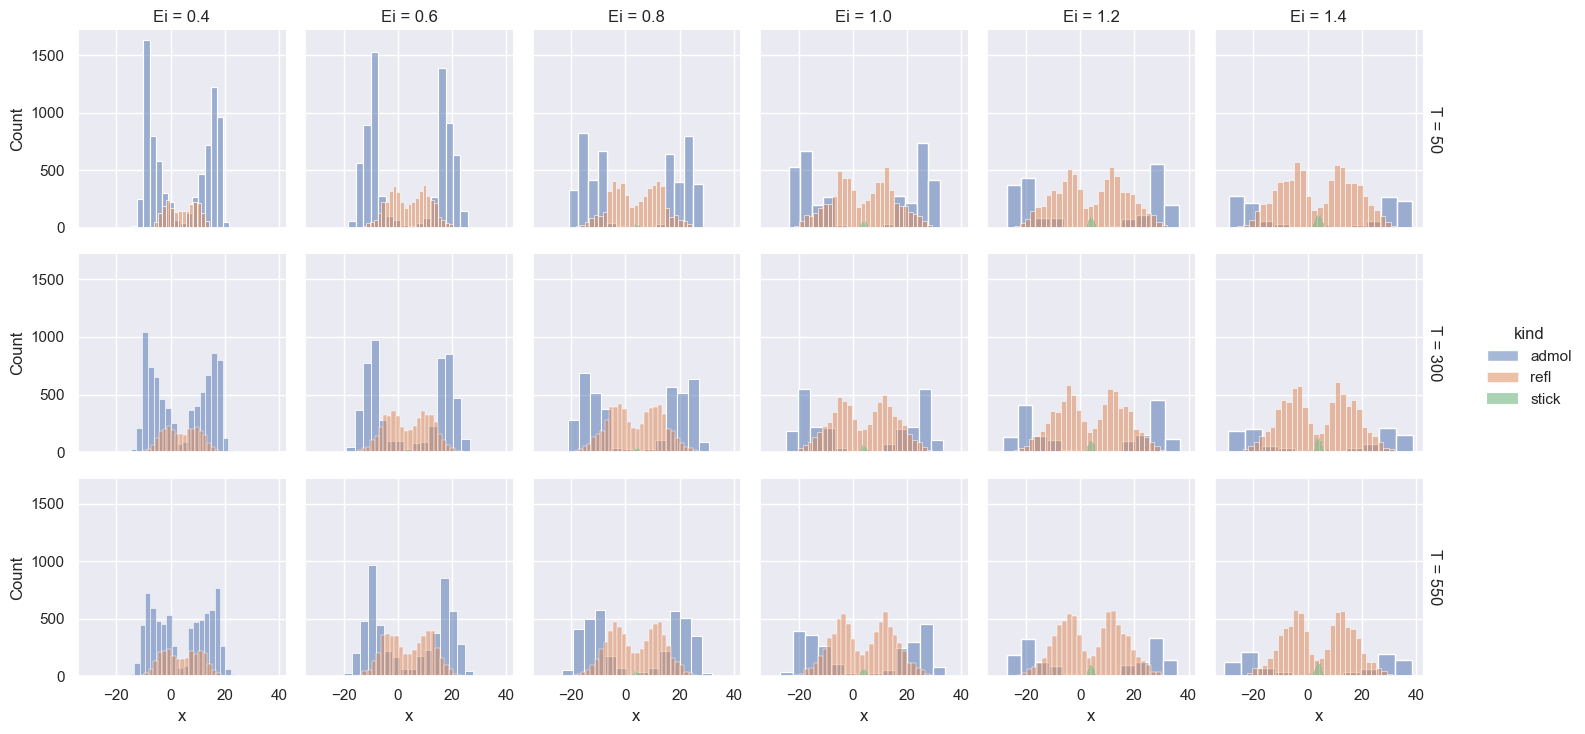

In [ ]:
g = sns.FacetGrid(CMs, hue="kind", row="T",col='Ei', margin_titles=True, height=2.5)
g.map(sns.histplot,'x', alpha=0.5)
g.add_legend()

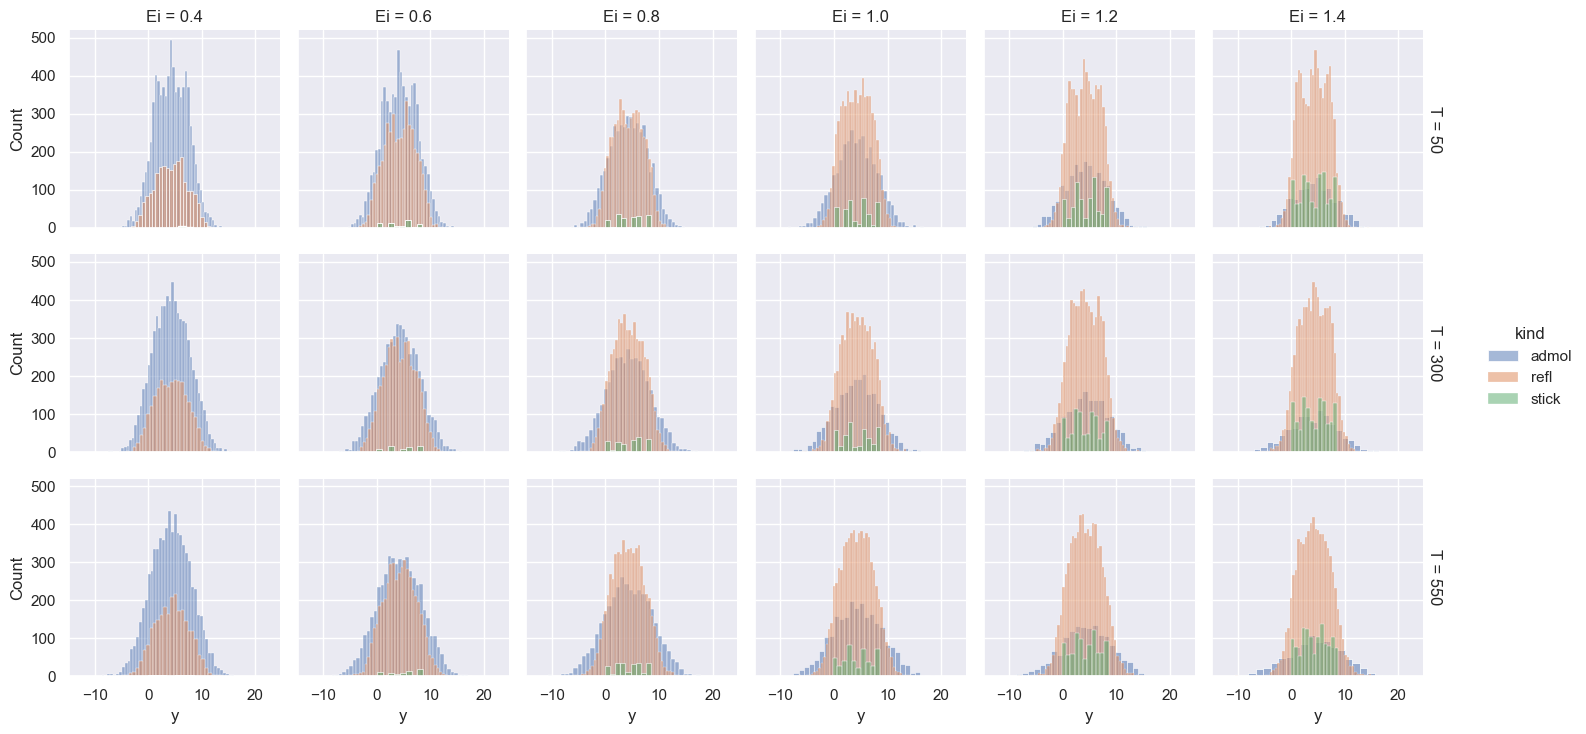

In [ ]:
g = sns.FacetGrid(CMs, hue="kind", row="T",col='Ei', margin_titles=True, height=2.5)
g.map(sns.histplot,'y', alpha=0.5)
g.add_legend()

In [ ]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x, y, gridsize=30, cmap=cmap, **kwargs)

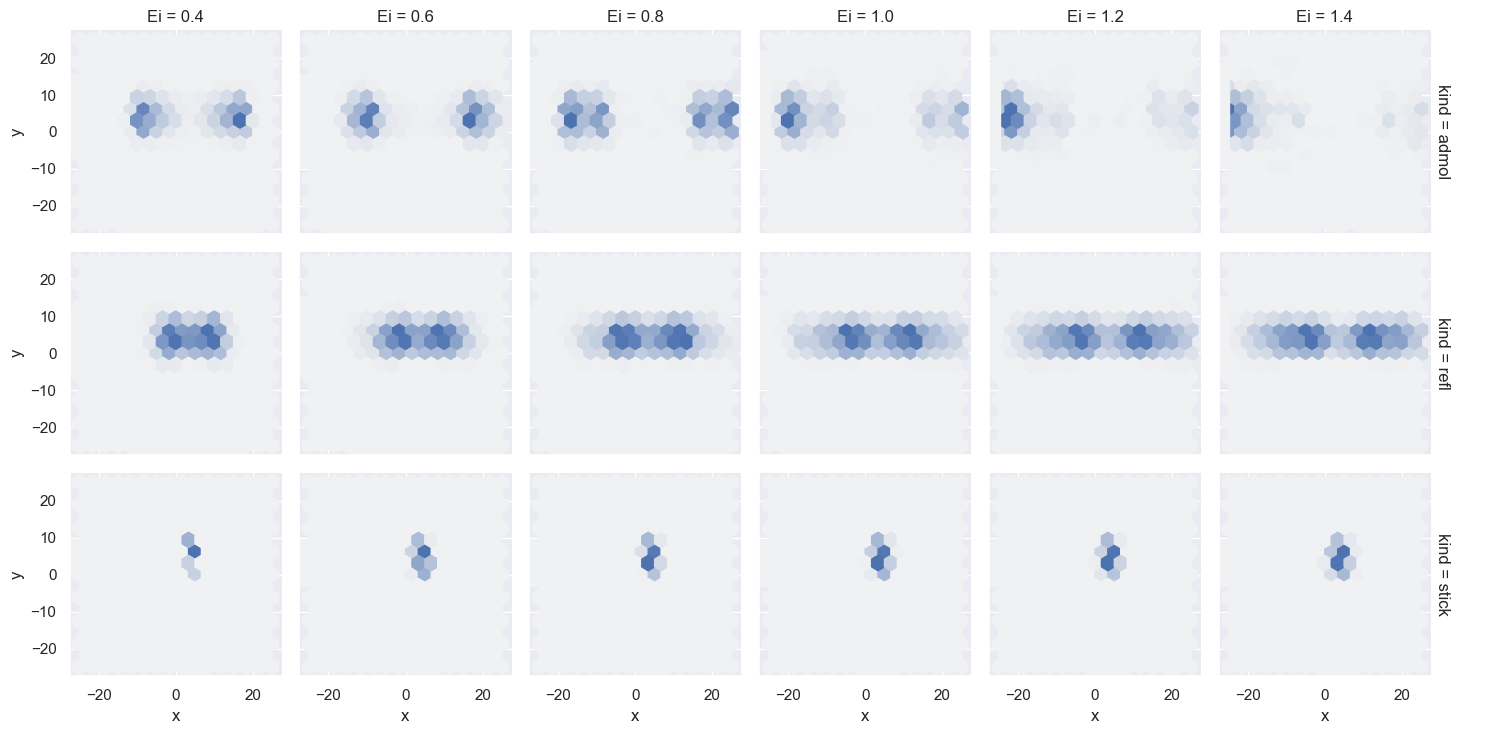

In [ ]:

g = sns.FacetGrid(CMs.query('T == 50'), row="kind", col="Ei", margin_titles=True, height=2.5)
g.map(hexbin,'x','y', extent=[-25, 25, -25, 25]) 
g.add_legend()

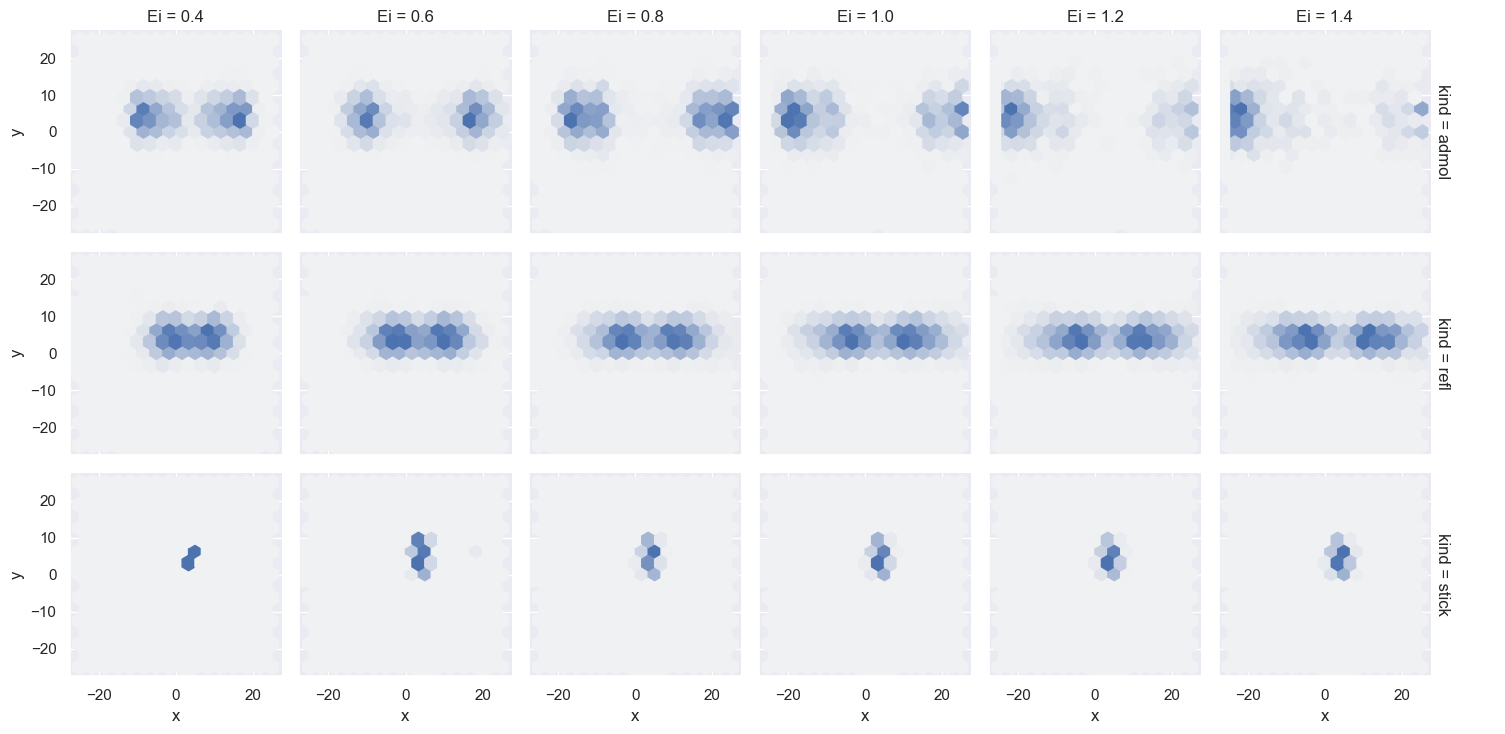

In [ ]:

g = sns.FacetGrid(CMs.query('T == 300'), row="kind", col="Ei", margin_titles=True, height=2.5)
g.map(hexbin,'x','y', extent=[-25, 25, -25, 25]) 
g.add_legend()

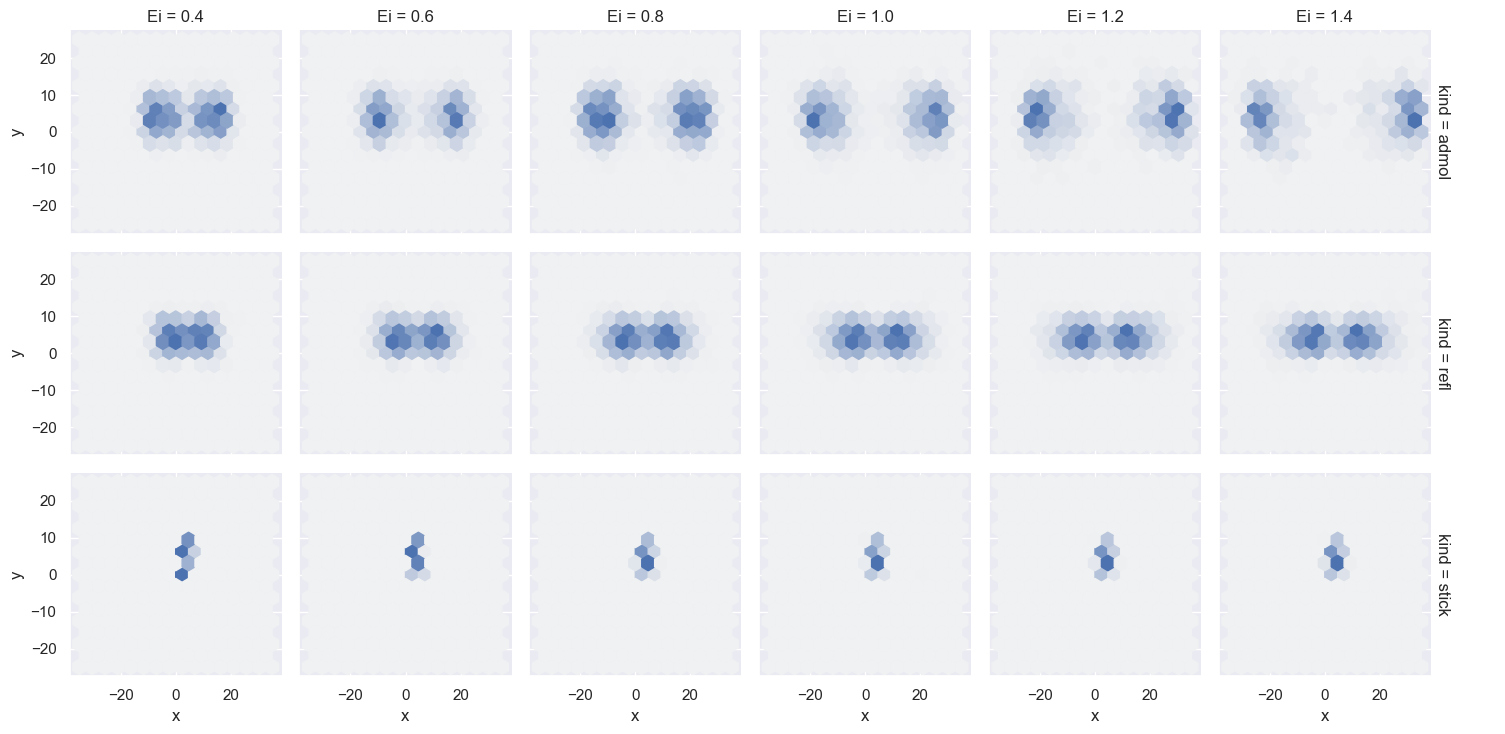

In [ ]:

g = sns.FacetGrid(CMs.query('T == 550'), row="kind", col="Ei", margin_titles=True, height=2.5)
g.map(hexbin,'x','y', extent=[-35, 35, -25, 25]) 
g.add_legend()

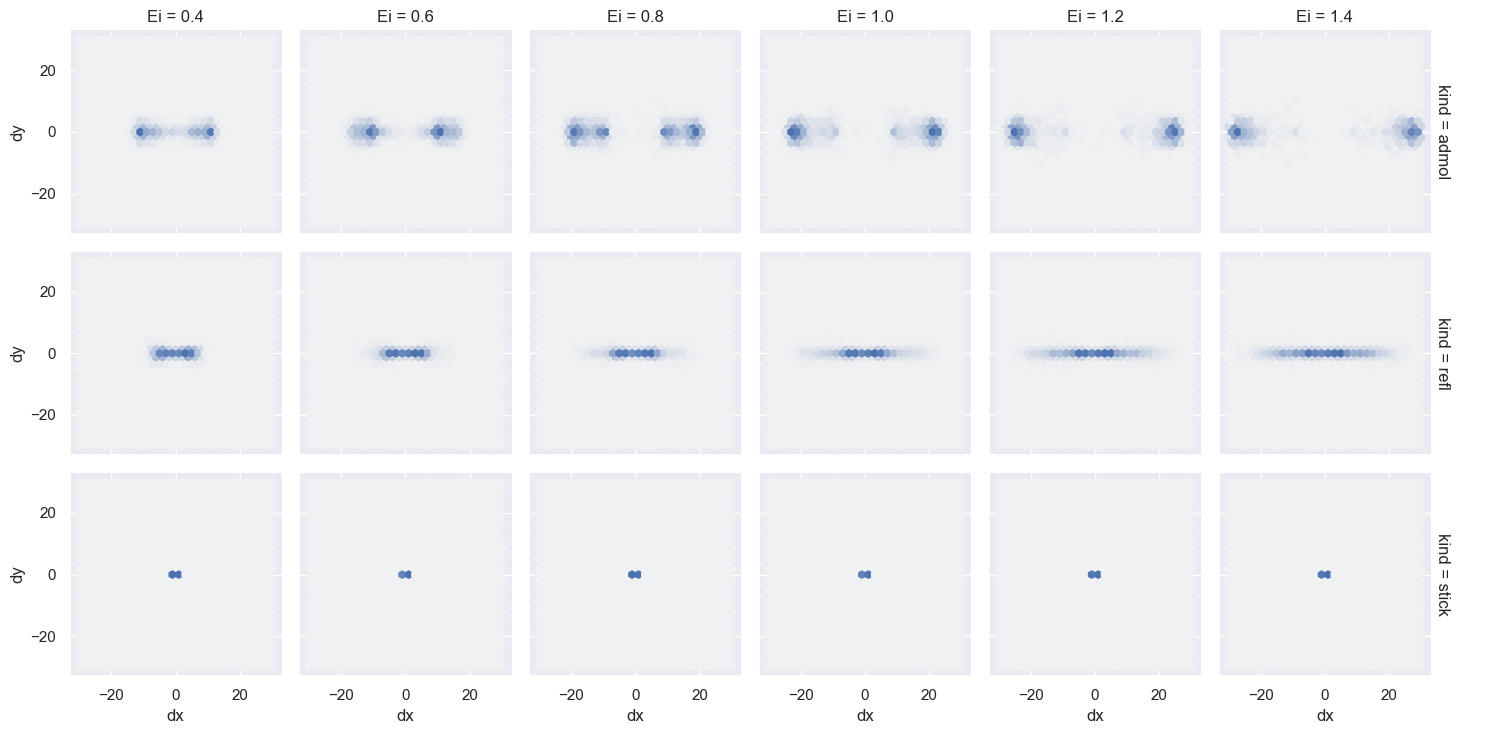

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(CMs.query('T == 50'), row="kind", col="Ei", margin_titles=True, height=2.5)
    g.map(hexbin,'dx','dy', extent=[-30, 30, -30, 30]) 
    g.add_legend()

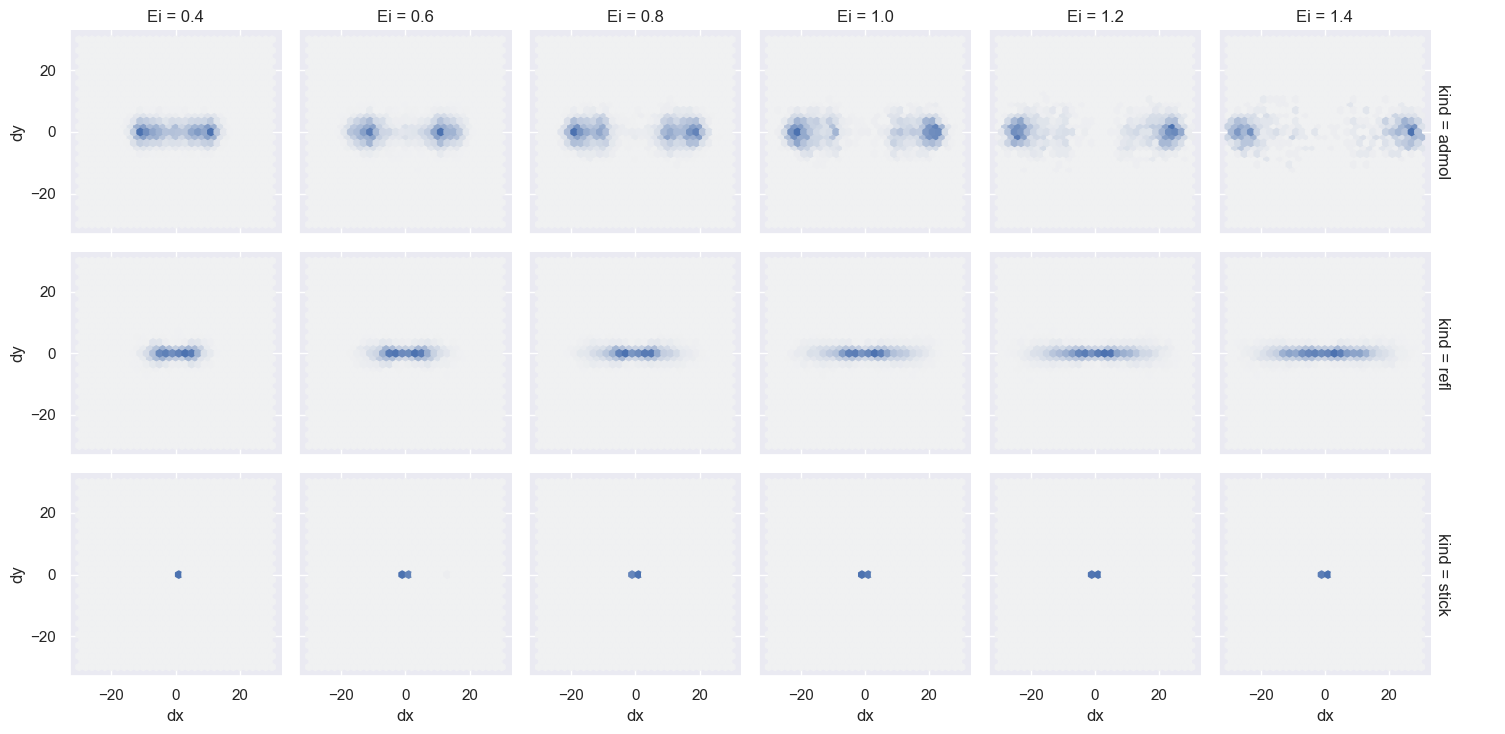

In [ ]:

g = sns.FacetGrid(CMs.query('T == 300'), row="kind", col="Ei", margin_titles=True, height=2.5)
g.map(hexbin,'dx','dy', extent=[-30, 30, -30, 30]) 
g.add_legend()

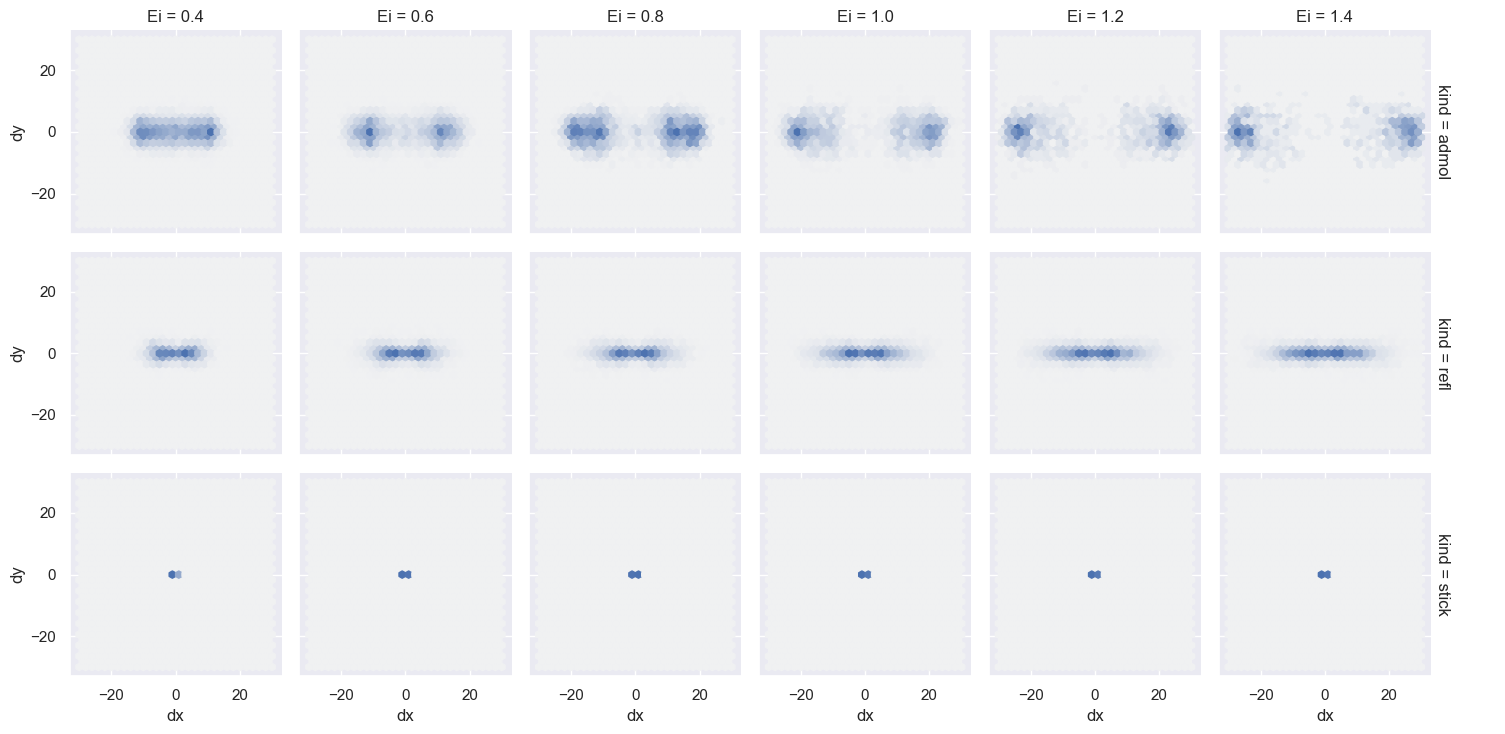

In [ ]:

g = sns.FacetGrid(CMs.query('T == 550'), row="kind", col="Ei", margin_titles=True, height=2.5)
g.map(hexbin,'dx','dy', extent=[-30, 30, -30, 30]) 
g.add_legend()

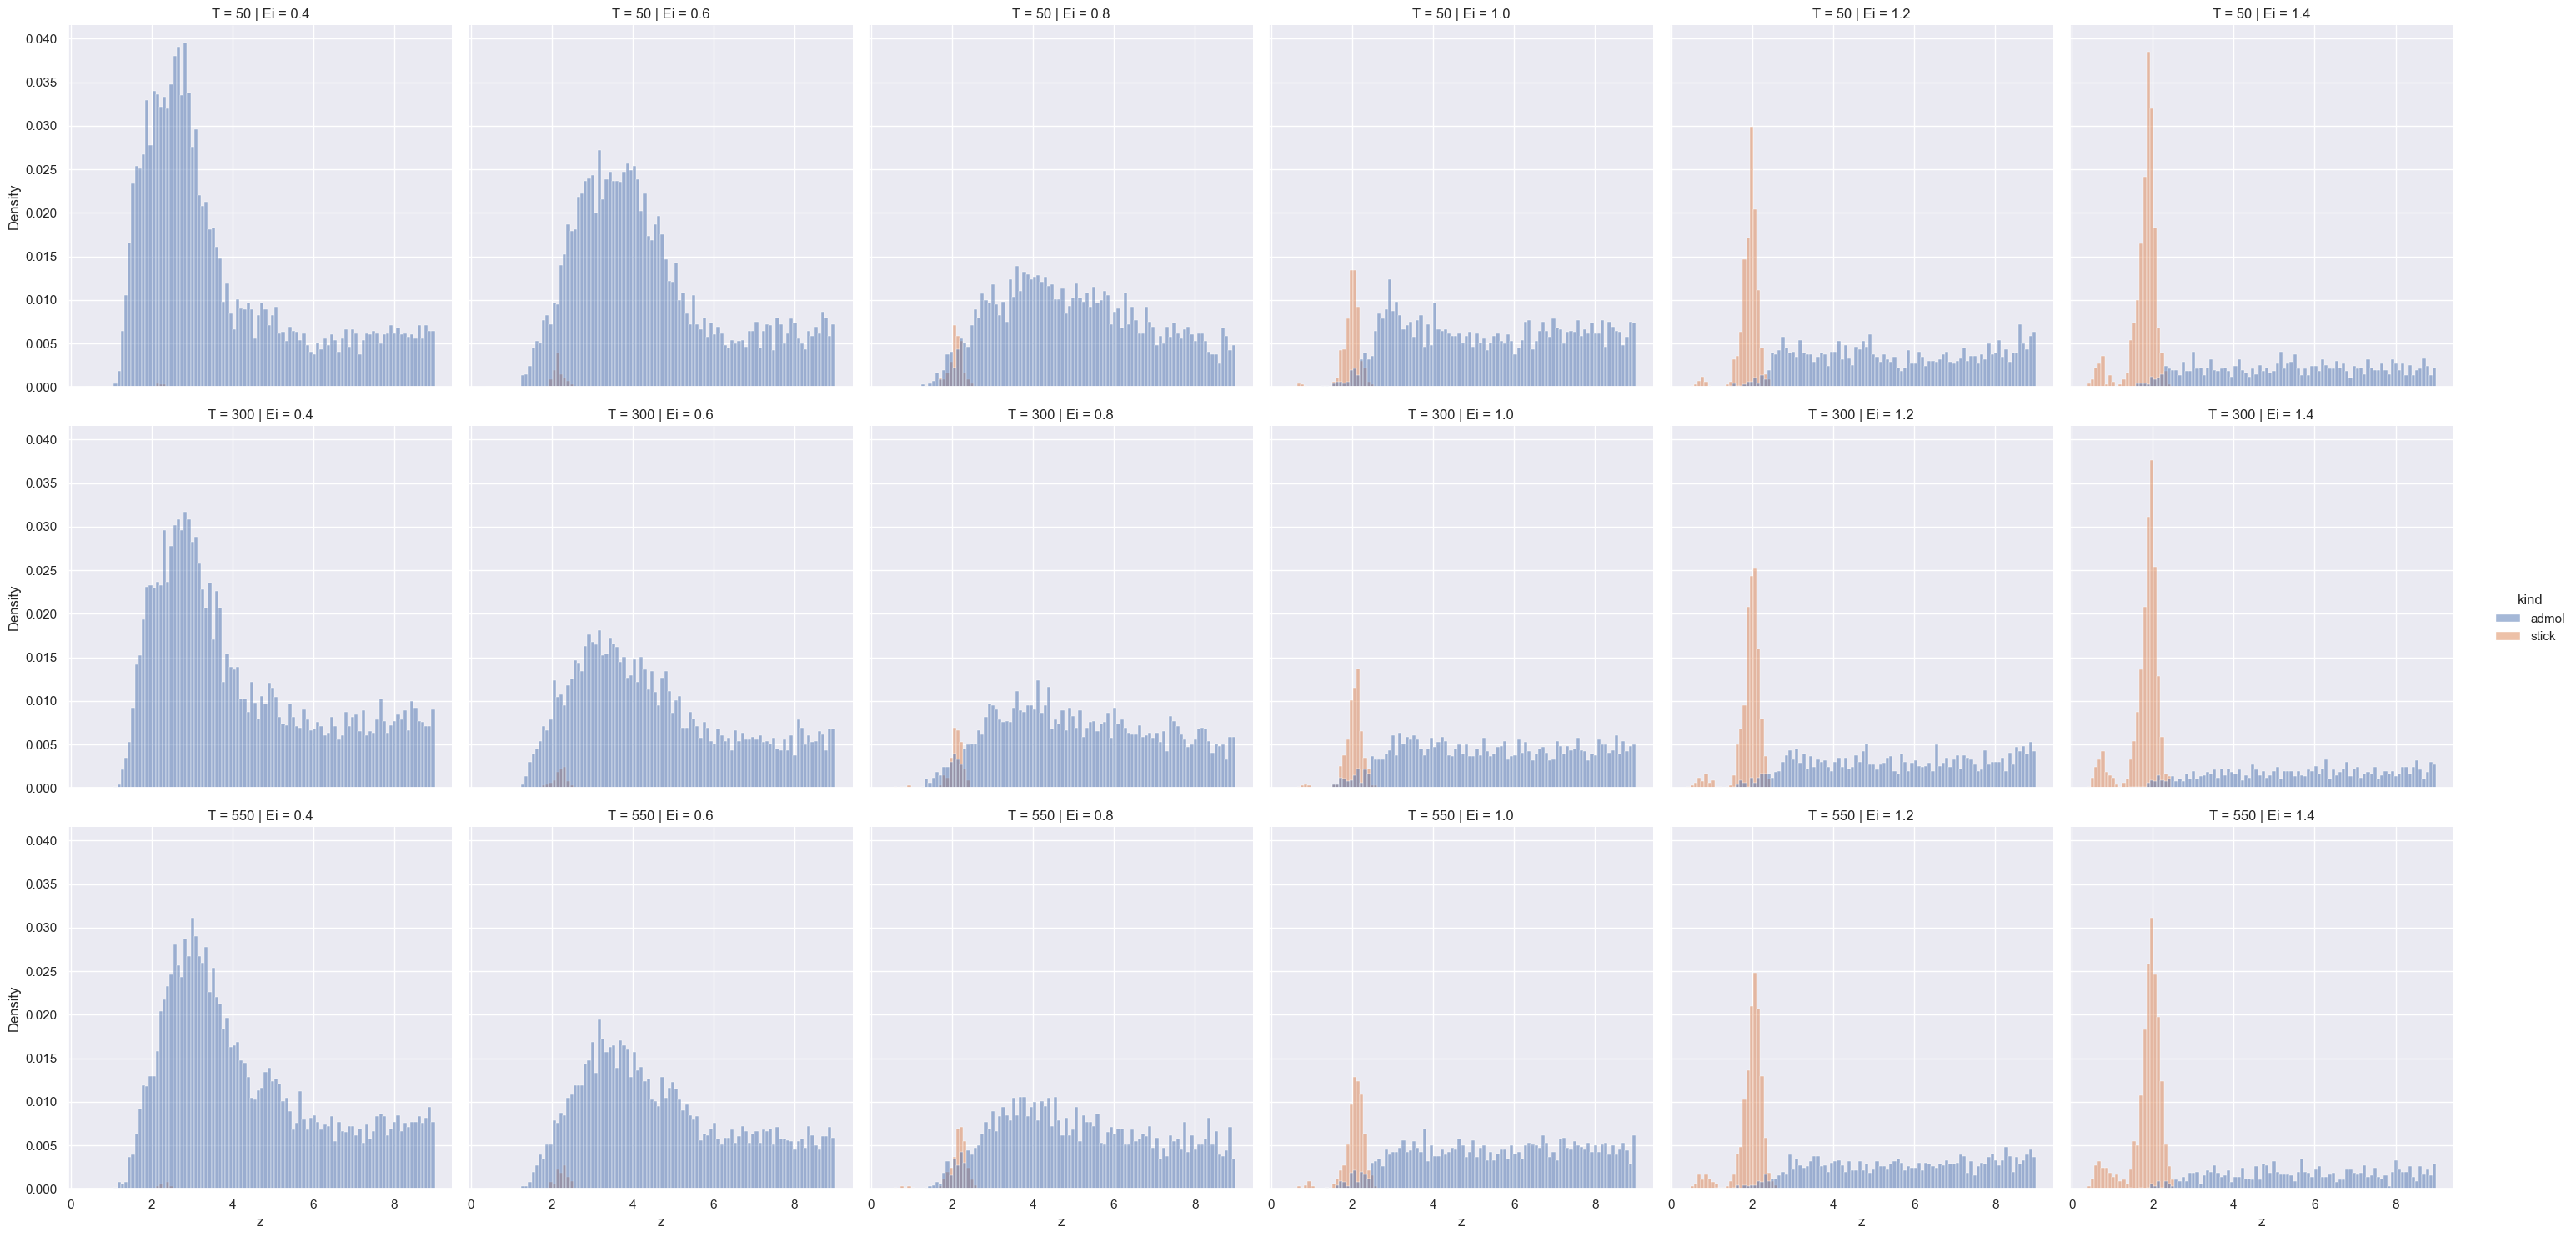

In [ ]:
sns.displot(data=CMs.query('kind != "refl"'), x="z", hue="kind", col="Ei", row='T', bins=100, stat='density')

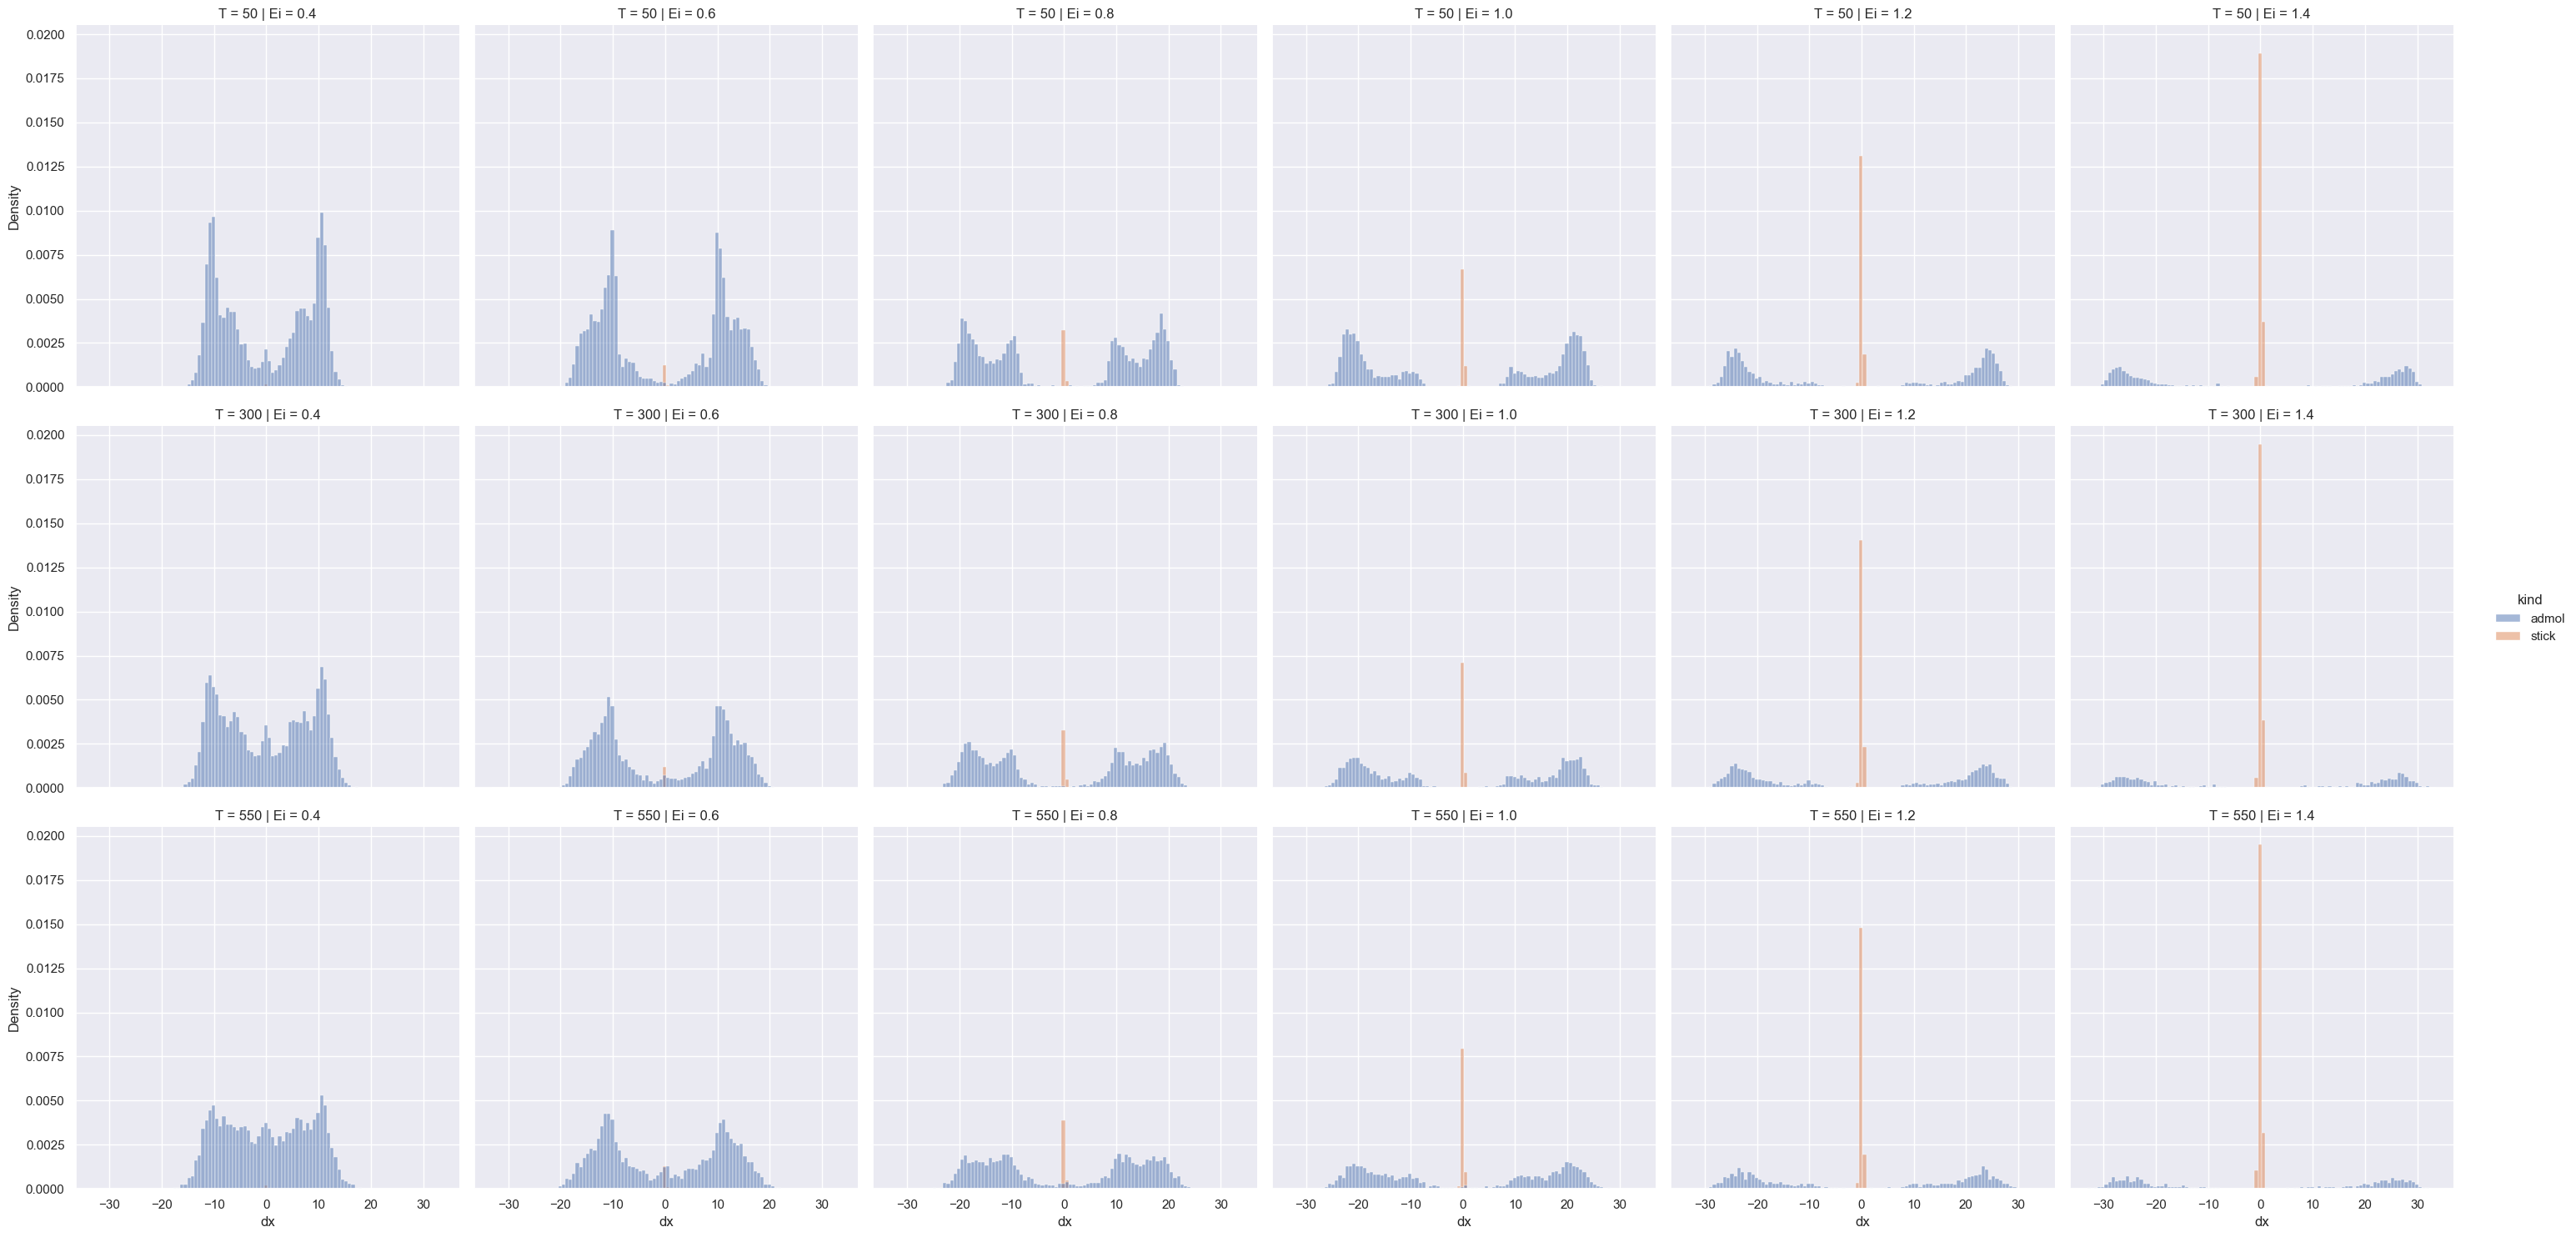

In [ ]:
sns.displot(data=CMs.query('kind != "refl"'), x="dx", hue="kind", col="Ei", row='T', bins=100, stat='density')

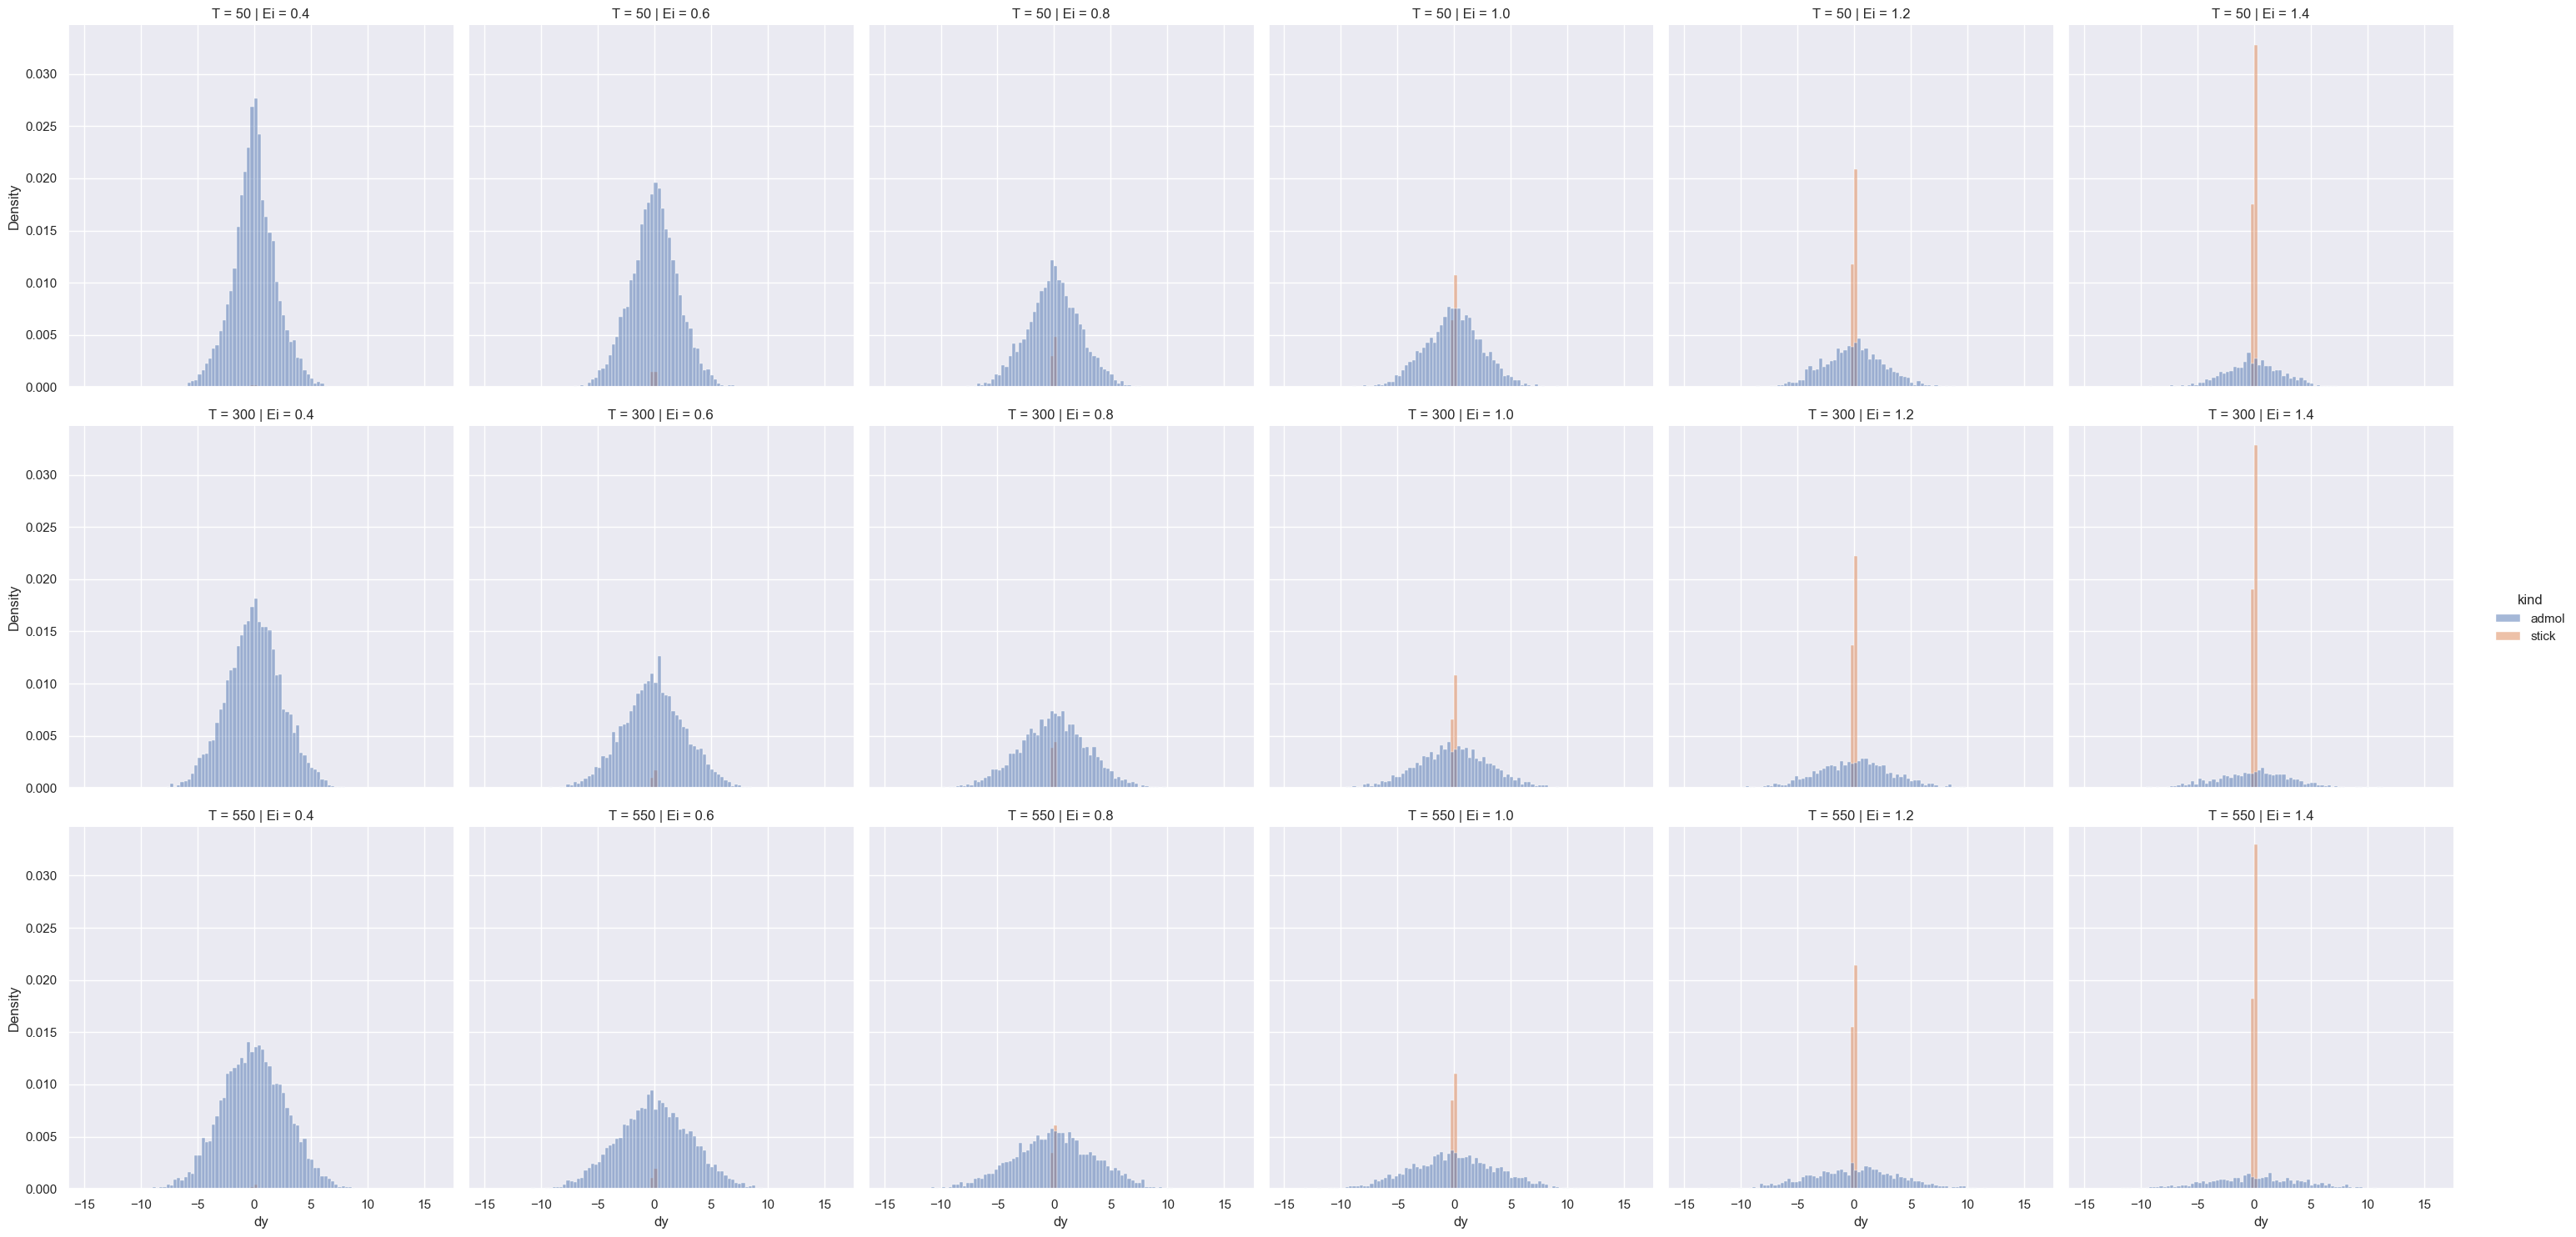

In [ ]:
sns.displot(data=CMs.query('kind != "refl"'), x="dy", hue="kind", col="Ei", row='T', bins=100, stat='density')

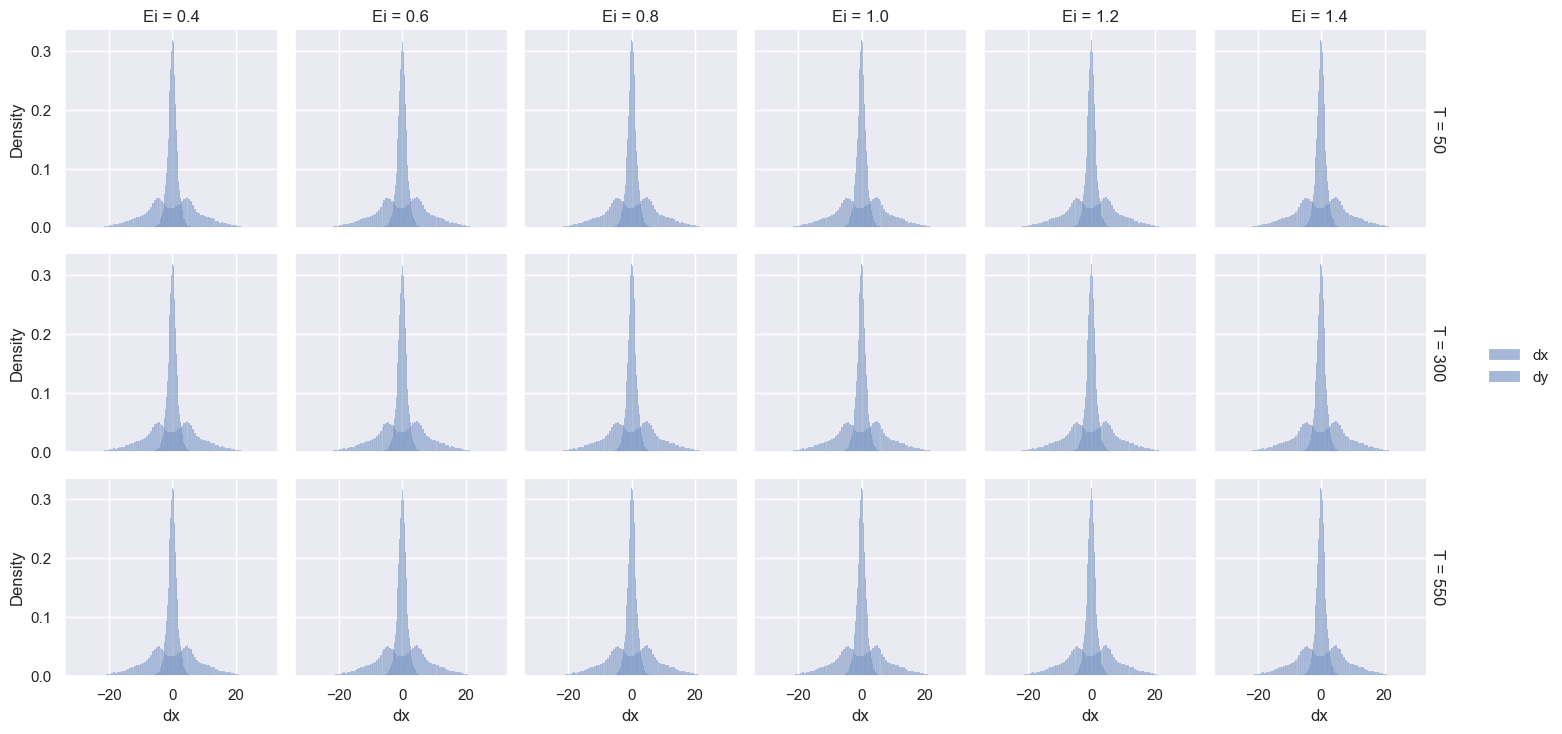

In [ ]:
g = sns.FacetGrid(CMs, row="T", col="Ei", margin_titles=True, height=2.5)
g.map(sns.histplot,data=CMs.query('kind == "refl"'), x="dx", hue="kind", bins=100, stat='density',color='red',label='dx') 
g.map(sns.histplot,data=CMs.query('kind == "refl"'), x="dy", hue="kind", bins=100, stat='density',color='blue',label='dy') 
g.add_legend()

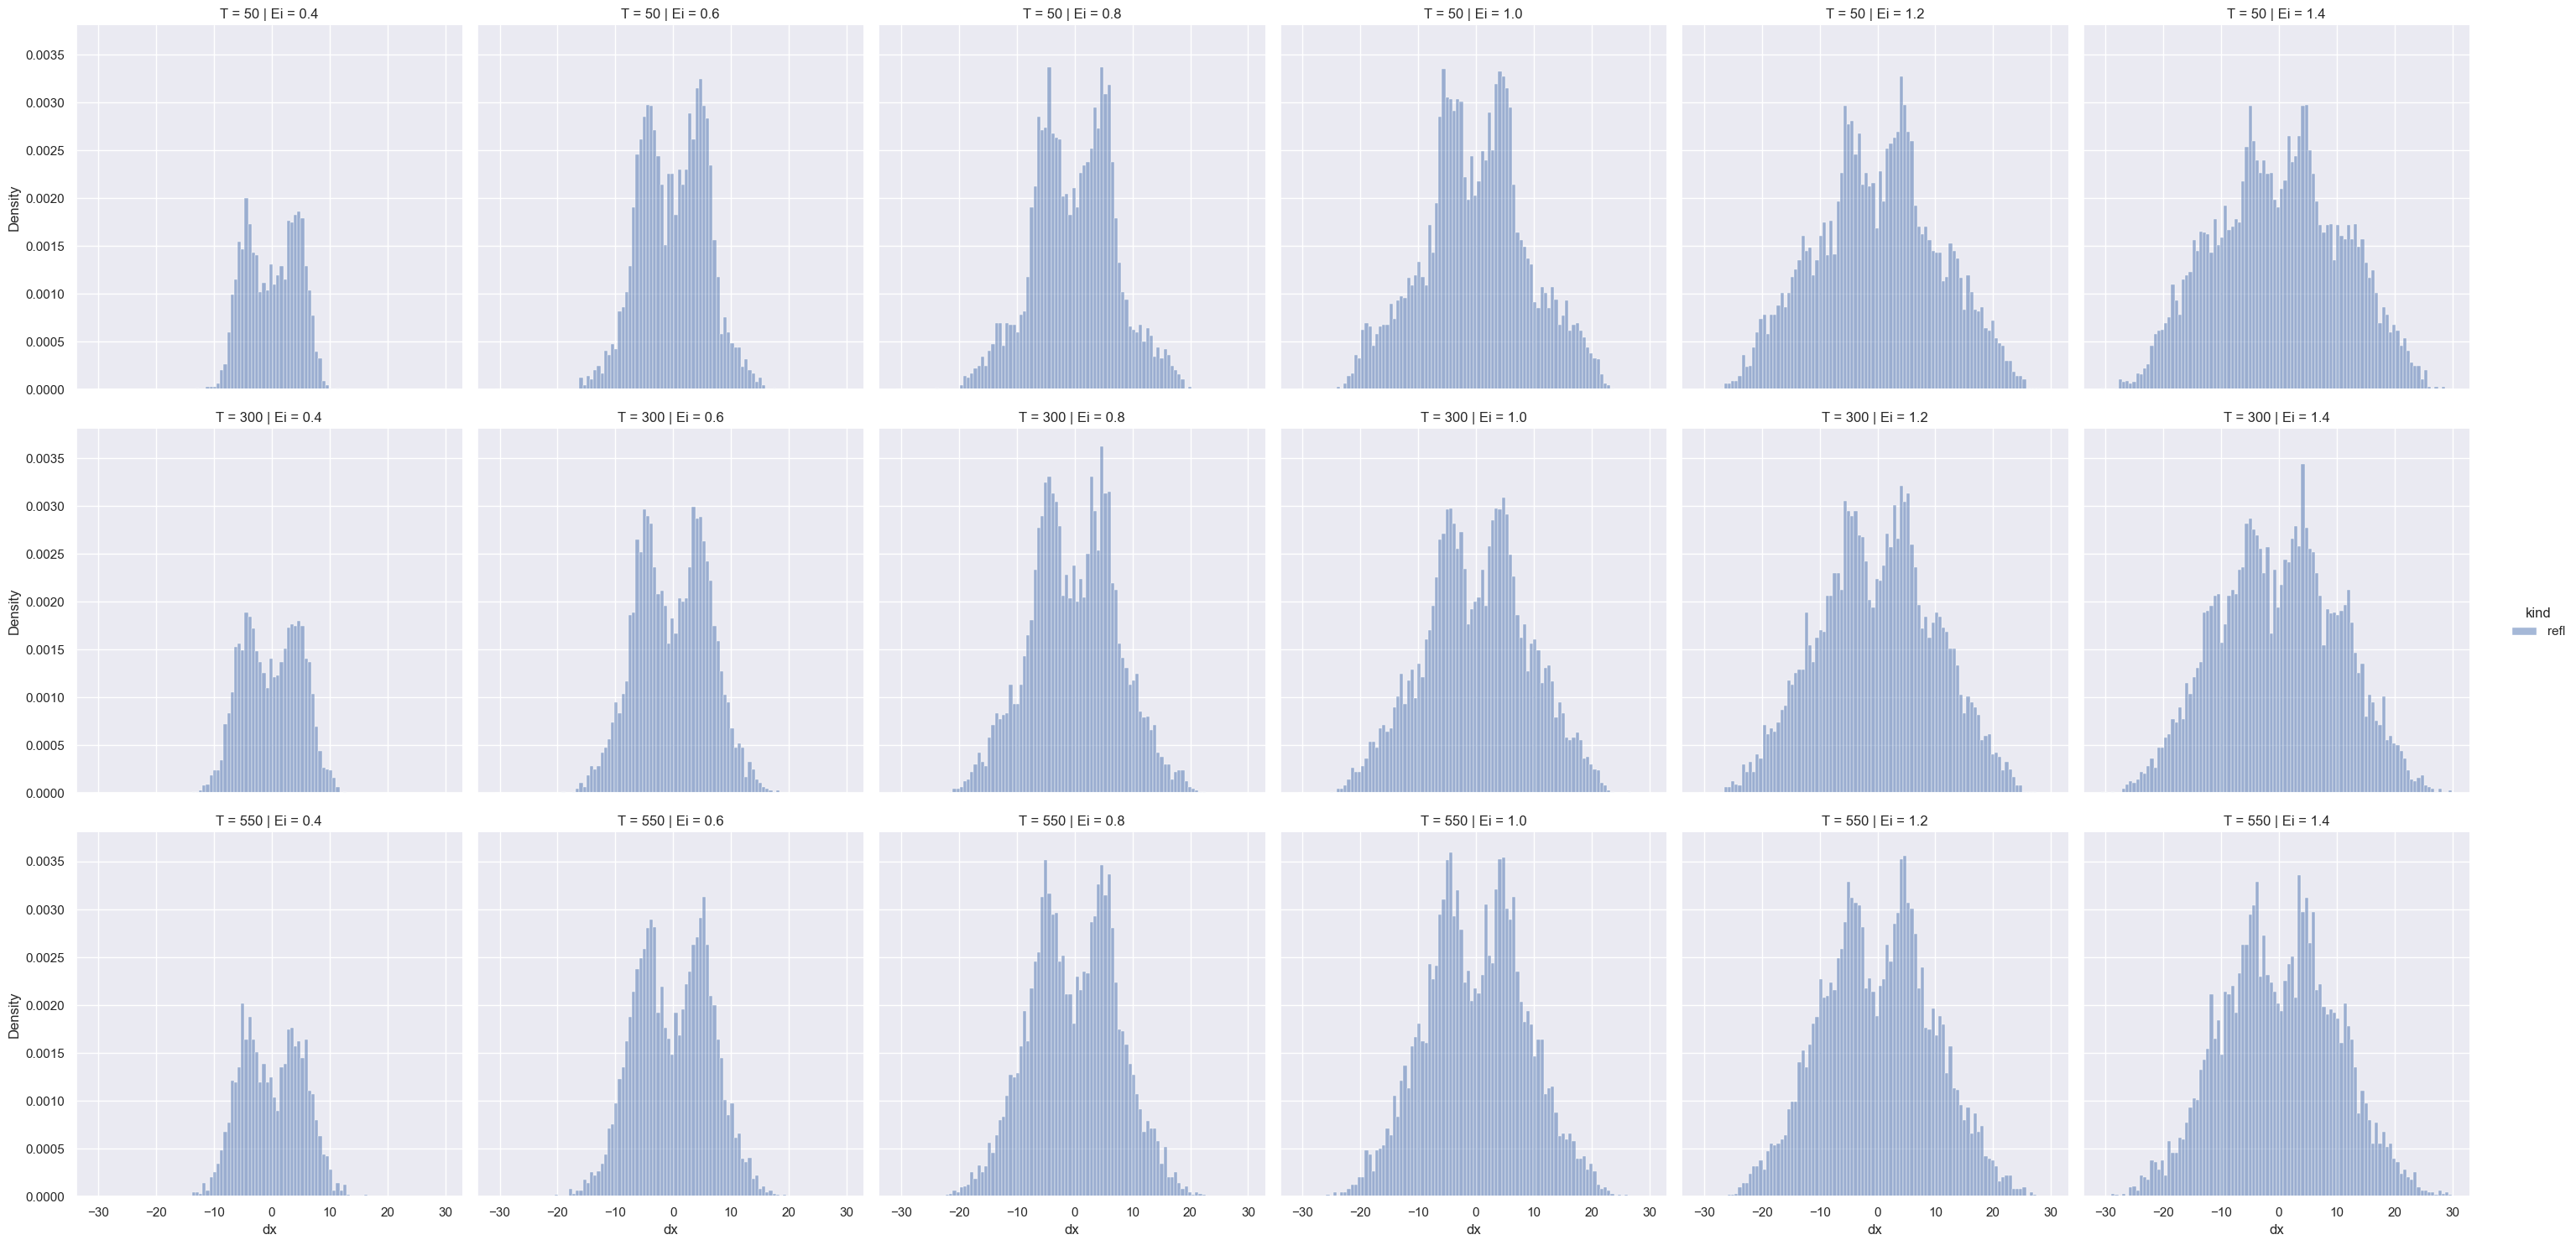

In [ ]:
sns.displot(data=CMs.query('kind == "refl"'), x="dx", hue="kind", col="Ei", row='T', bins=100, stat='density')

## Disociación sobre atomo de Pt

In [ ]:
trajs_all_stick

ncoup    nt       t  nreb  nsubh  ptad         V   Ei   kind    T
0      2321  1510  0.3018     0      4    51  0.935684  0.4  stick   50
1      3384  1502  0.3002     0      4    49  1.049950  0.4  stick   50
2      3525  1610  0.3218     1      4    51  1.337092  0.4  stick   50
3      3611  1535  0.3068     0      1    49  1.287614  0.4  stick   50
4      5257  1504  0.3006     0      4    51  0.955718  0.4  stick   50
...     ...   ...     ...   ...    ...   ...       ...  ...    ...  ...
8245   9966   998  0.1994     1      4    51  3.587370  1.4  stick  550
8246   9980   895  0.1788     1      1    50  3.367813  1.4  stick  550
8247   9988   907  0.1812     0      3    49  3.354040  1.4  stick  550
8248   9993  1000  0.1998     1      2    50  2.708475  1.4  stick  550
8249   9995   959  0.1916     1      3    49  2.726991  1.4  stick  550

[8250 rows x 10 columns]

In [ ]:
dPt_stick = dPt.query('kind == "stick"')
dPt_stick

ntraj  nat        dx        dy        dz   Ei   kind    T
0         2321   31  0.057324 -0.029630 -0.014623  0.4  stick   50
1         2321   32  0.038994 -0.050930 -0.024849  0.4  stick   50
2         2321   33  0.058371 -0.033094 -0.046881  0.4  stick   50
3         2321   34  0.006967 -0.054592 -0.011560  0.4  stick   50
4         2321   35  0.022585  0.006333 -0.010755  0.4  stick   50
...        ...  ...       ...       ...       ...  ...    ...  ...
3631105   9879   47 -0.088285  0.460123 -0.051751  1.4  stick  550
3631106   9879   48 -0.074423  0.257100  0.037956  1.4  stick  550
3631107   9879   49 -0.103517  0.359508  0.322479  1.4  stick  550
3631108   9879   50  0.015749  0.515746  0.155656  1.4  stick  550
3631109   9879   51 -0.188284  0.457305  0.202864  1.4  stick  550

[173796 rows x 8 columns]

In [ ]:
df_stick = pd.merge(trajs_all_stick, dPt_stick , left_on=['T', 'Ei', 'ncoup', 'ptad'], right_on=['T', 'Ei', 'ntraj','nat'])
df_stick

ncoup    nt       t  nreb  nsubh  ptad         V   Ei kind_x    T   
0      2321  1510  0.3018     0      4    51  0.935684  0.4  stick   50  \
1      3384  1502  0.3002     0      4    49  1.049950  0.4  stick   50   
2      3525  1610  0.3218     1      4    51  1.337092  0.4  stick   50   
3      3611  1535  0.3068     0      1    49  1.287614  0.4  stick   50   
4      5257  1504  0.3006     0      4    51  0.955718  0.4  stick   50   
...     ...   ...     ...   ...    ...   ...       ...  ...    ...  ...   
8271   9966   998  0.1994     1      4    51  3.587370  1.4  stick  550   
8272   9980   895  0.1788     1      1    50  3.367813  1.4  stick  550   
8273   9988   907  0.1812     0      3    49  3.354040  1.4  stick  550   
8274   9993  1000  0.1998     1      2    50  2.708475  1.4  stick  550   
8275   9995   959  0.1916     1      3    49  2.726991  1.4  stick  550   

      ntraj  nat        dx        dy        dz kind_y  
0      2321   51  0.075253 -0.004670  0.139315  stick  
1      3384   49  0.027453 -0.136301  0.045059  stick  
2      3525   51  0.017758  0.027674  0.074649  stick  
3      3611   49 -0.008771  0.158637  0.098002  stick  
4      5257   51 -0.025945  0.058823  0.012909  stick  
...     ...  ...       ...       ...       ...    ...  
8271   9966   51 -0.117910 -0.359715  0.122281  stick  
8272   9980   50 -0.047303  0.277008  0.196774  stick  
8273   9988   49 -0.001546  0.571940  0.085672  stick  
8274   9993   50 -0.180344 -0.004562 -0.004063  stick  
8275   9995   49 -0.044513 -0.771141  0.051879  stick  

[8276 rows x 16 columns]

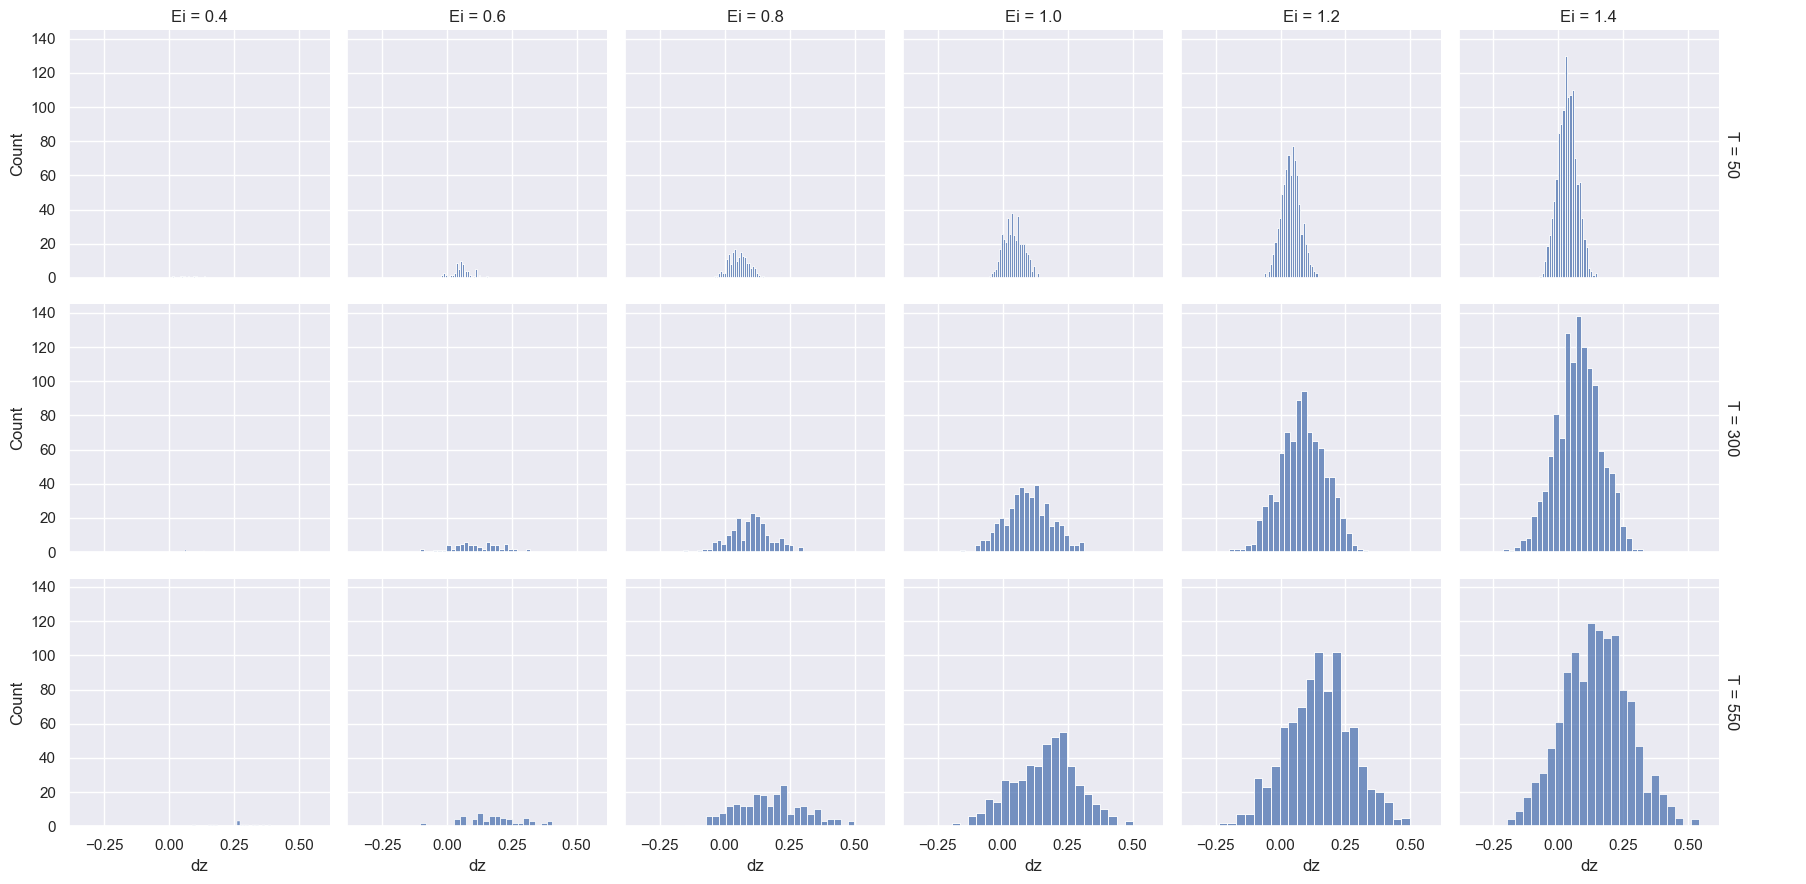

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(df_stick, row="T", col="Ei", margin_titles=True)
    g.map(sns.histplot,'dz', bins=25) 
    g.add_legend()

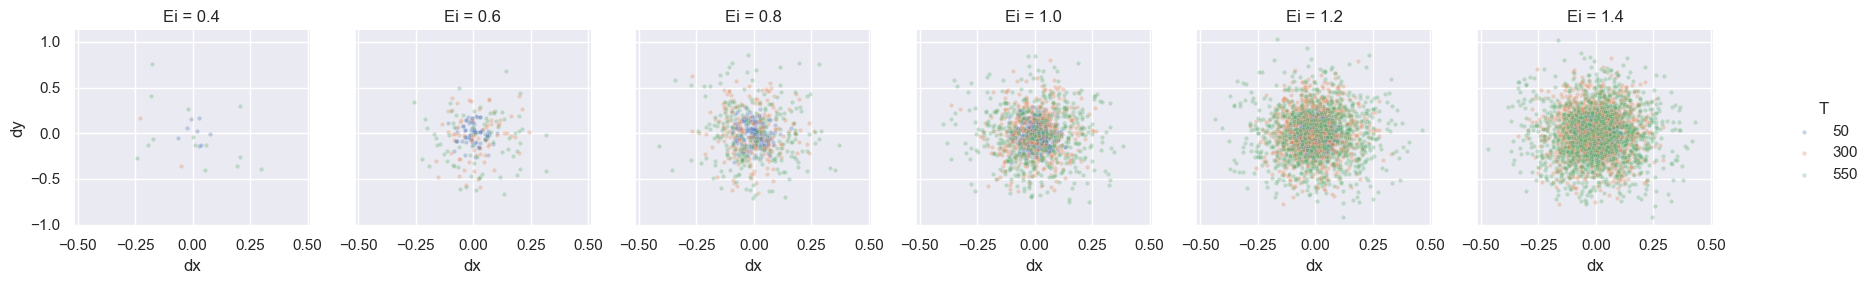

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(df_stick, hue="T", col="Ei", margin_titles=True)
    g.map(sns.scatterplot,'dx','dy', s=10,alpha=0.3) 
    g.add_legend()

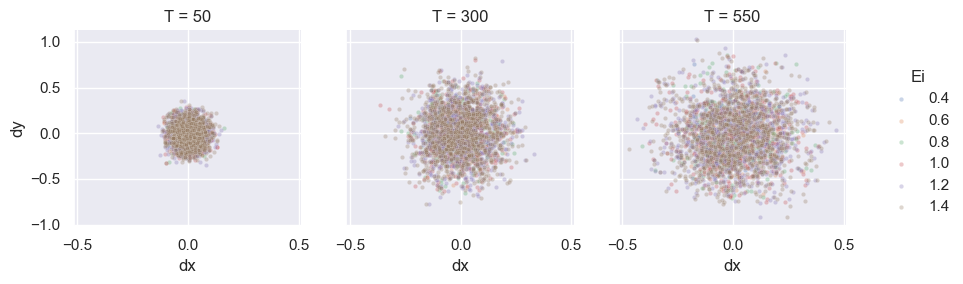

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(df_stick, hue="Ei", col="T", margin_titles=True)
    g.map(sns.scatterplot,'dx','dy', s=10,alpha=0.3) 
    g.add_legend()

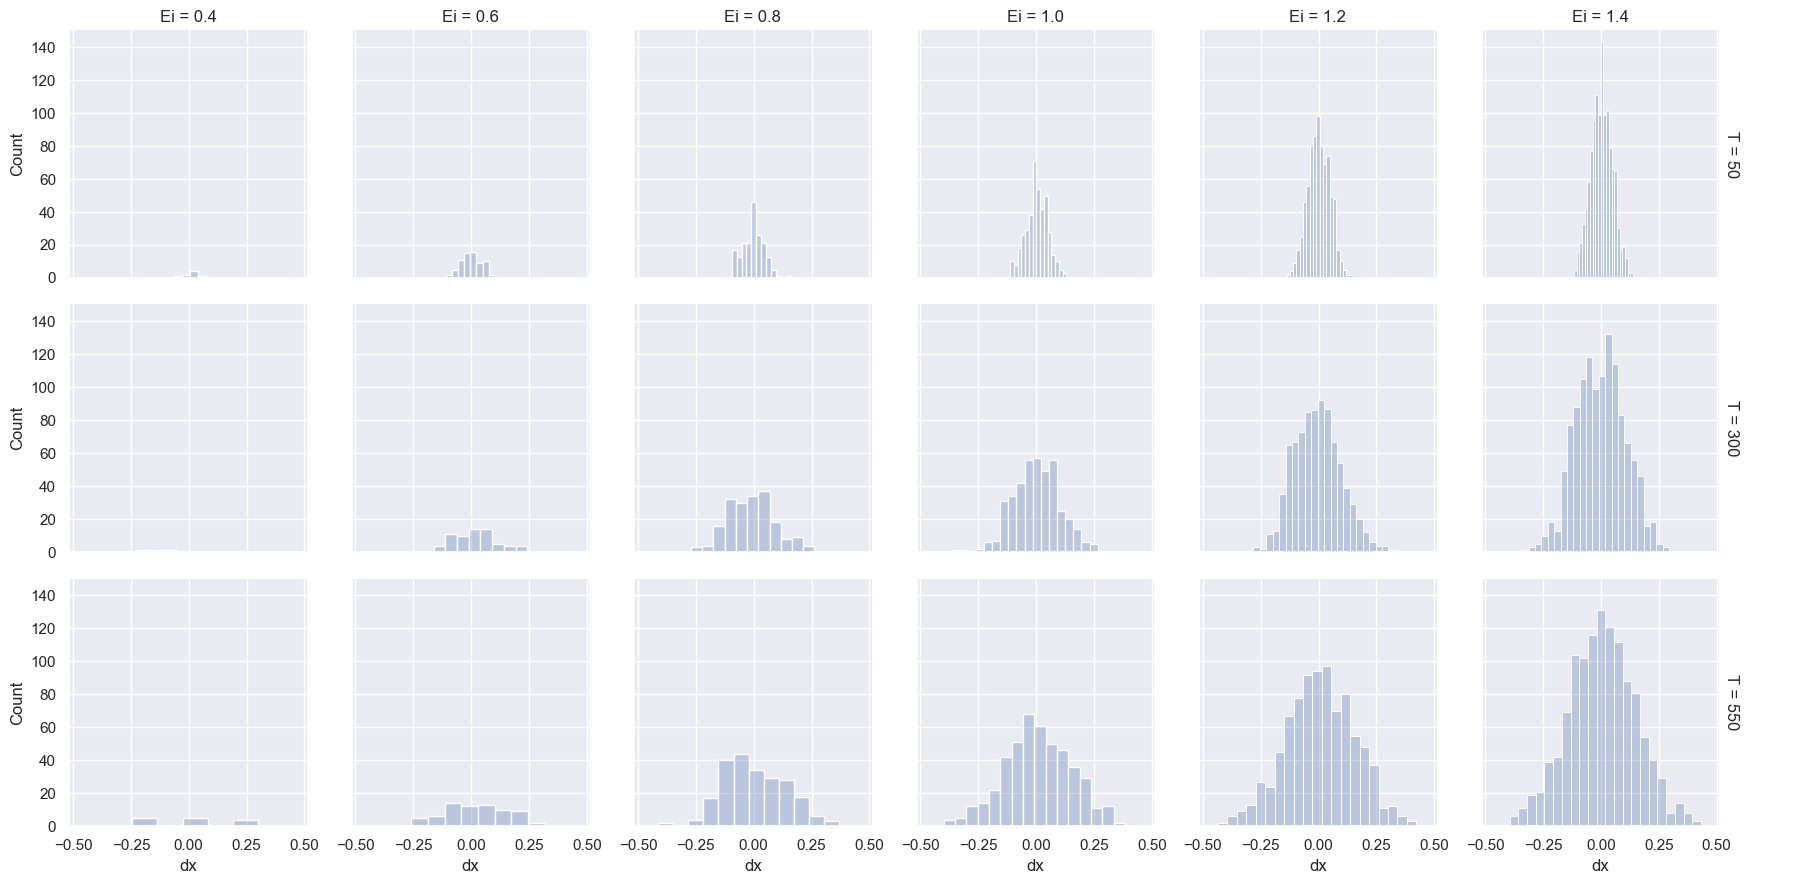

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(df_stick, row="T", col="Ei", margin_titles=True)
    g.map(sns.histplot,'dx',alpha=0.3) 
    g.add_legend()

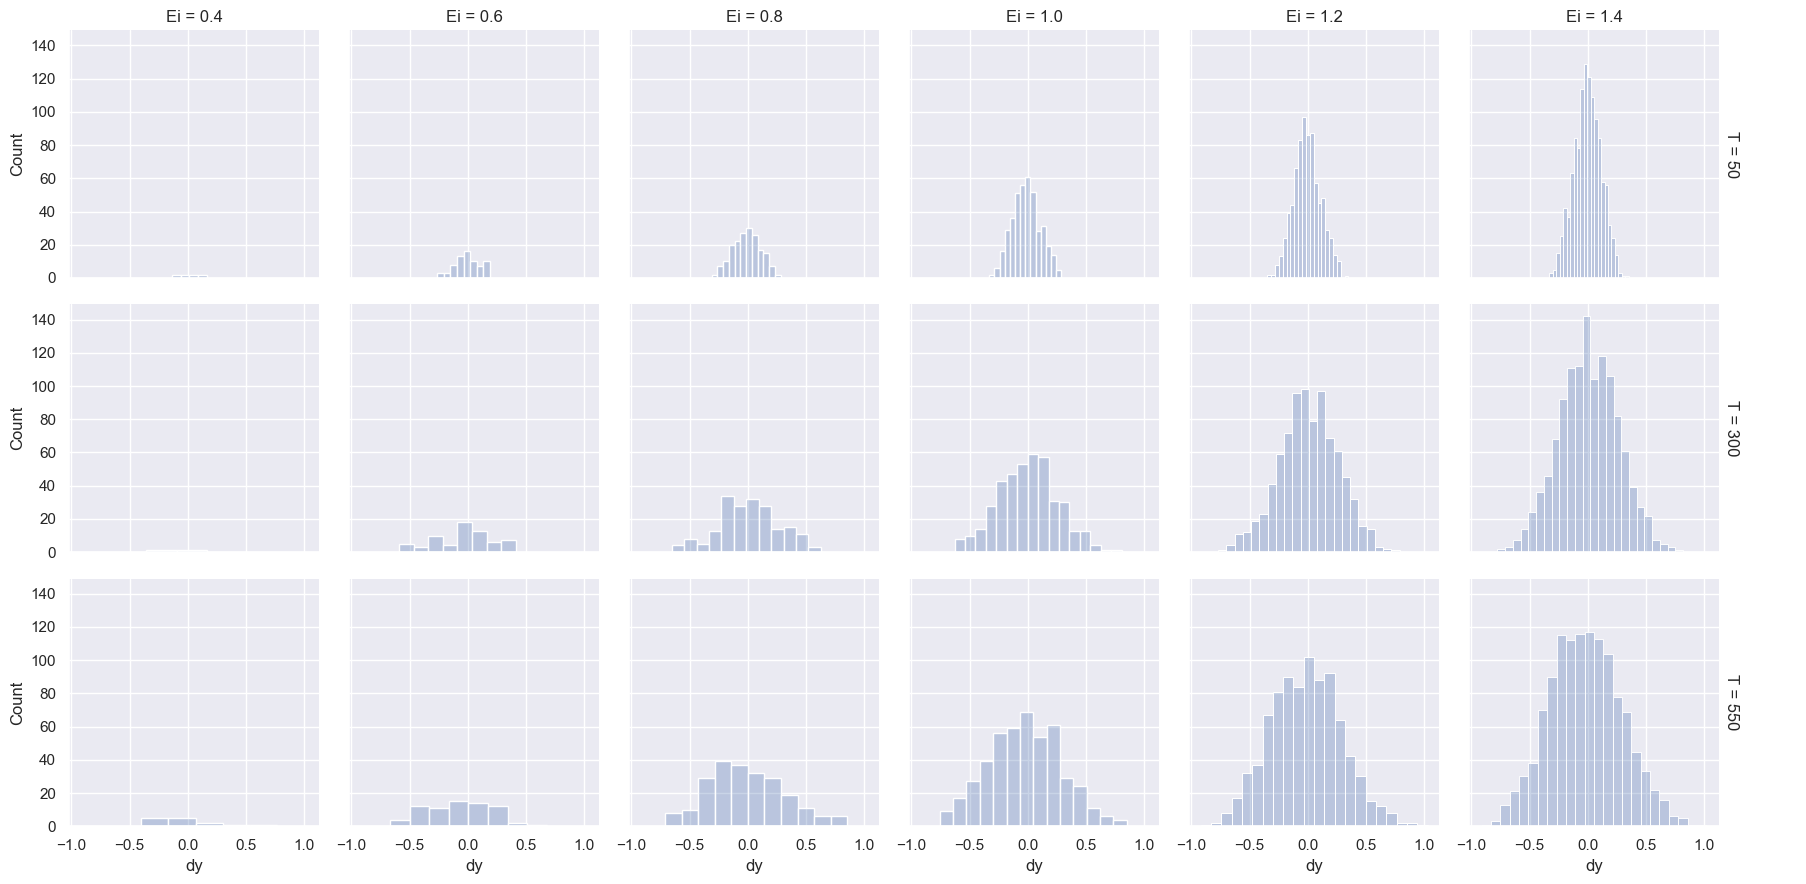

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(df_stick, row="T", col="Ei", margin_titles=True)
    g.map(sns.histplot,'dy',alpha=0.3) 
    g.add_legend()

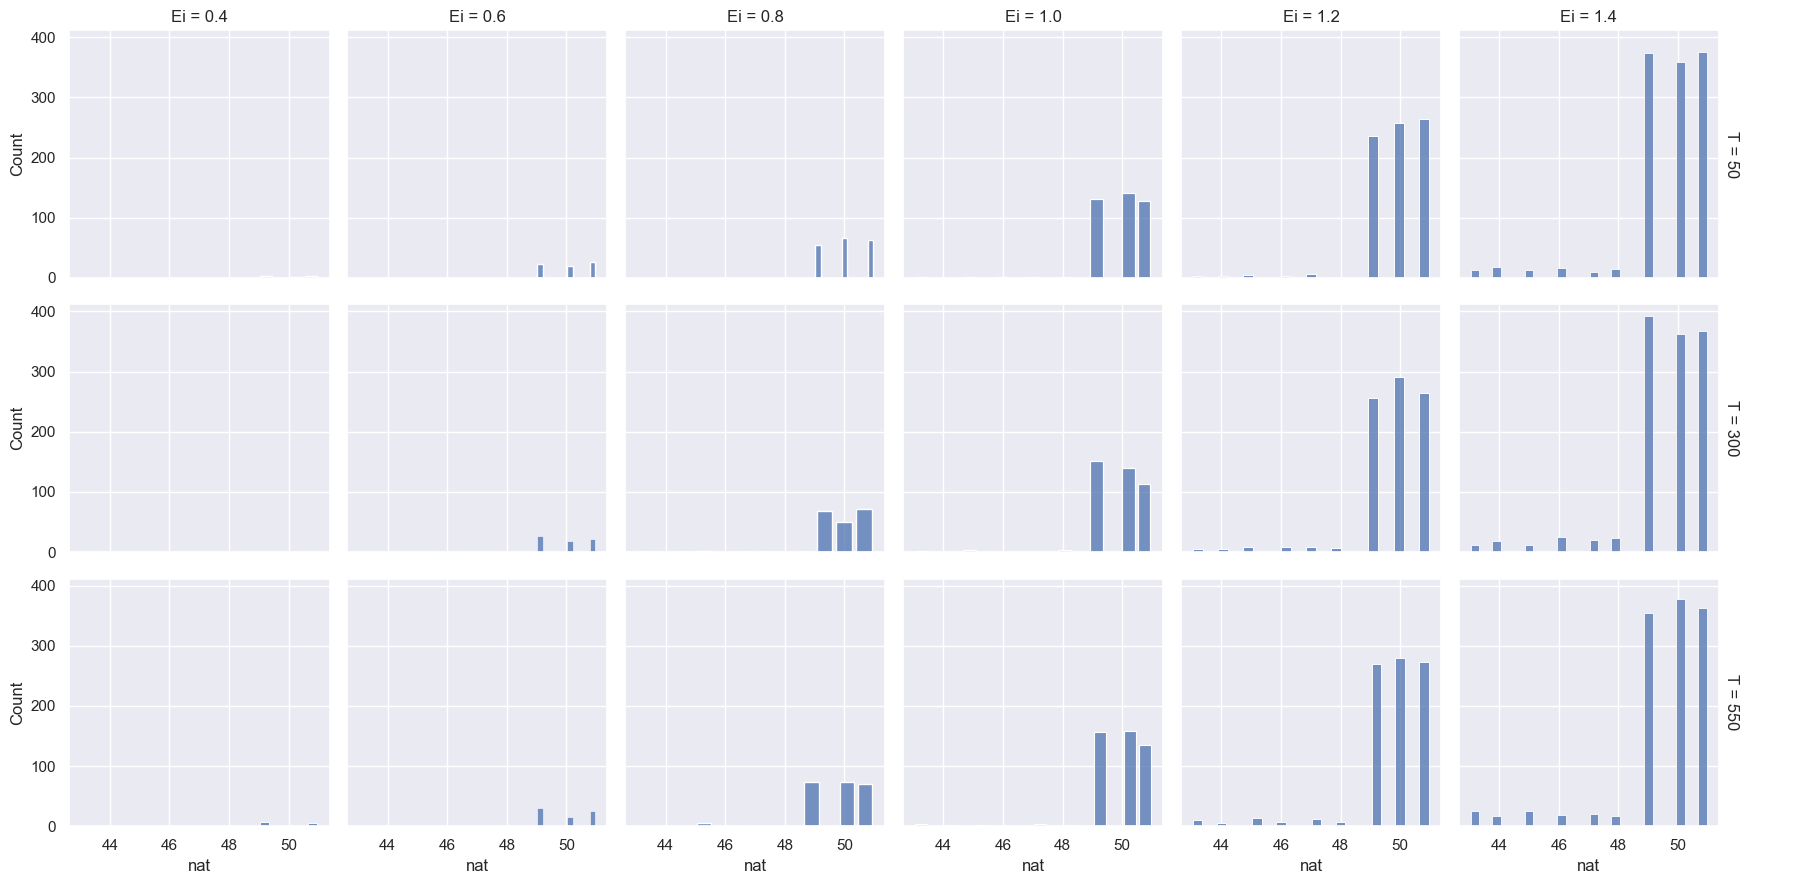

In [ ]:
with sns.axes_style("darkgrid"):
    g = sns.FacetGrid(df_stick, row="T", col="Ei", margin_titles=True, despine=False)
    g.map(sns.histplot,'nat', multiple="dodge", shrink=.8) 
    g.add_legend()

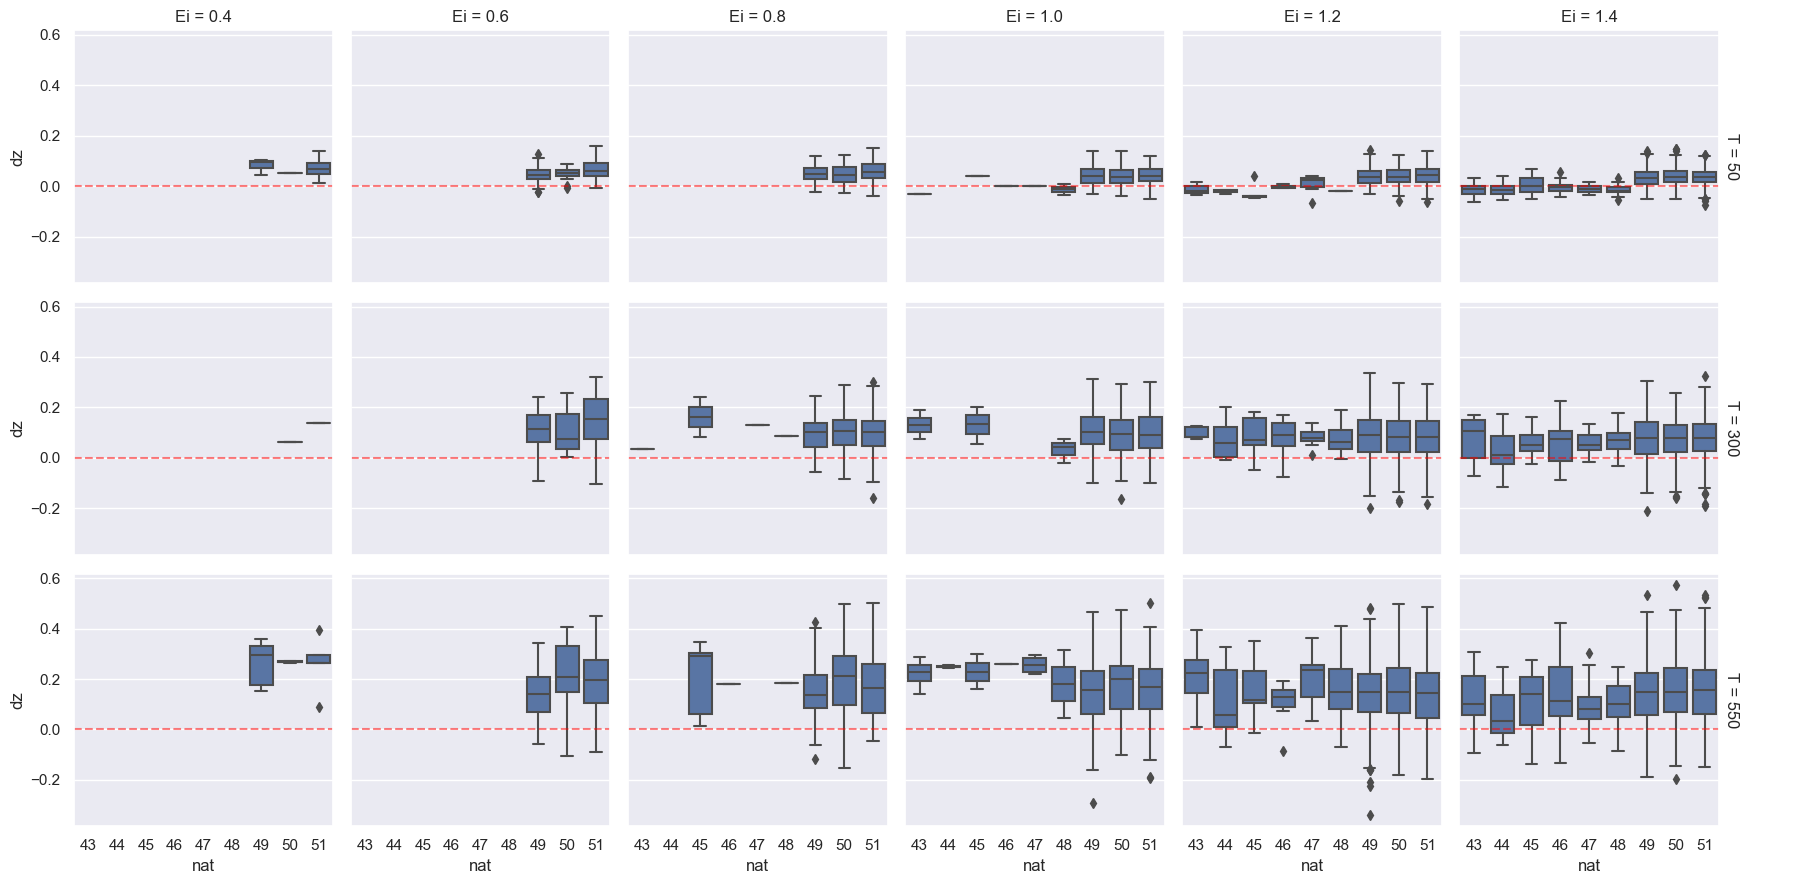

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_stick, row="T", col="Ei", margin_titles=True, despine=False)
g.map(sns.boxplot,'nat','dz', order=[43,44,45,46,47,48,49,50,51]) 
g.refline(y=0, color='red',alpha=0.5)
g.tight_layout()
g.add_legend()

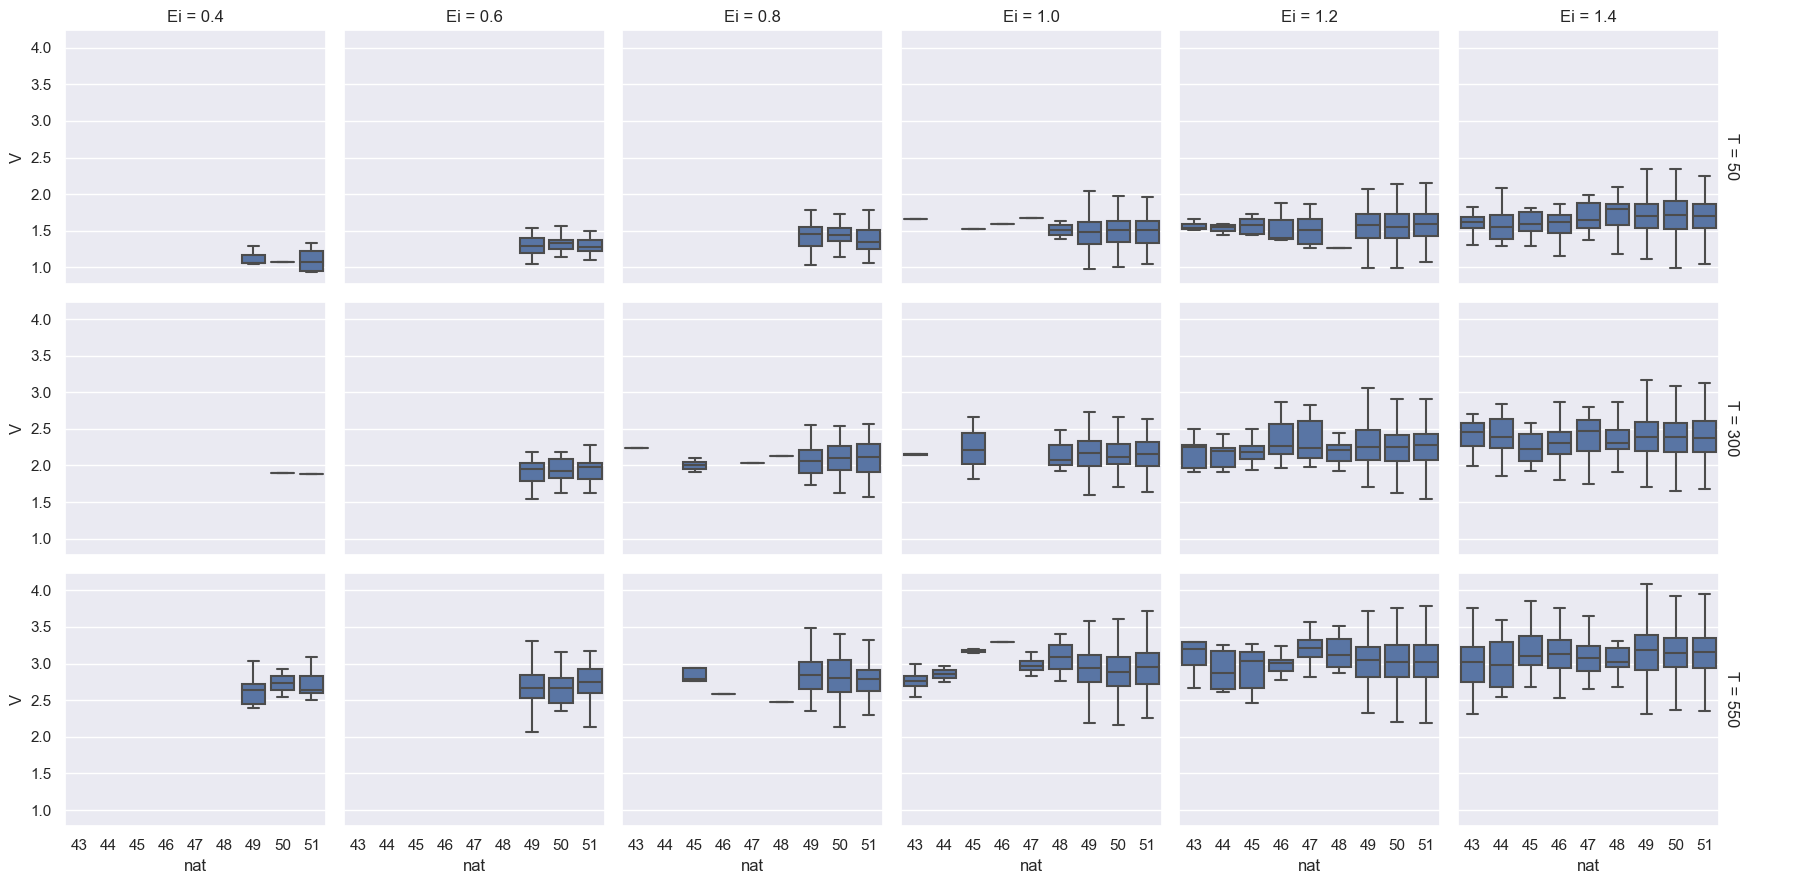

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_stick, row="T", col="Ei", margin_titles=True, despine=False)
g.map(sns.boxplot,'nat','V', sym="", order=[43,44,45,46,47,48,49,50,51]) 
g.add_legend()

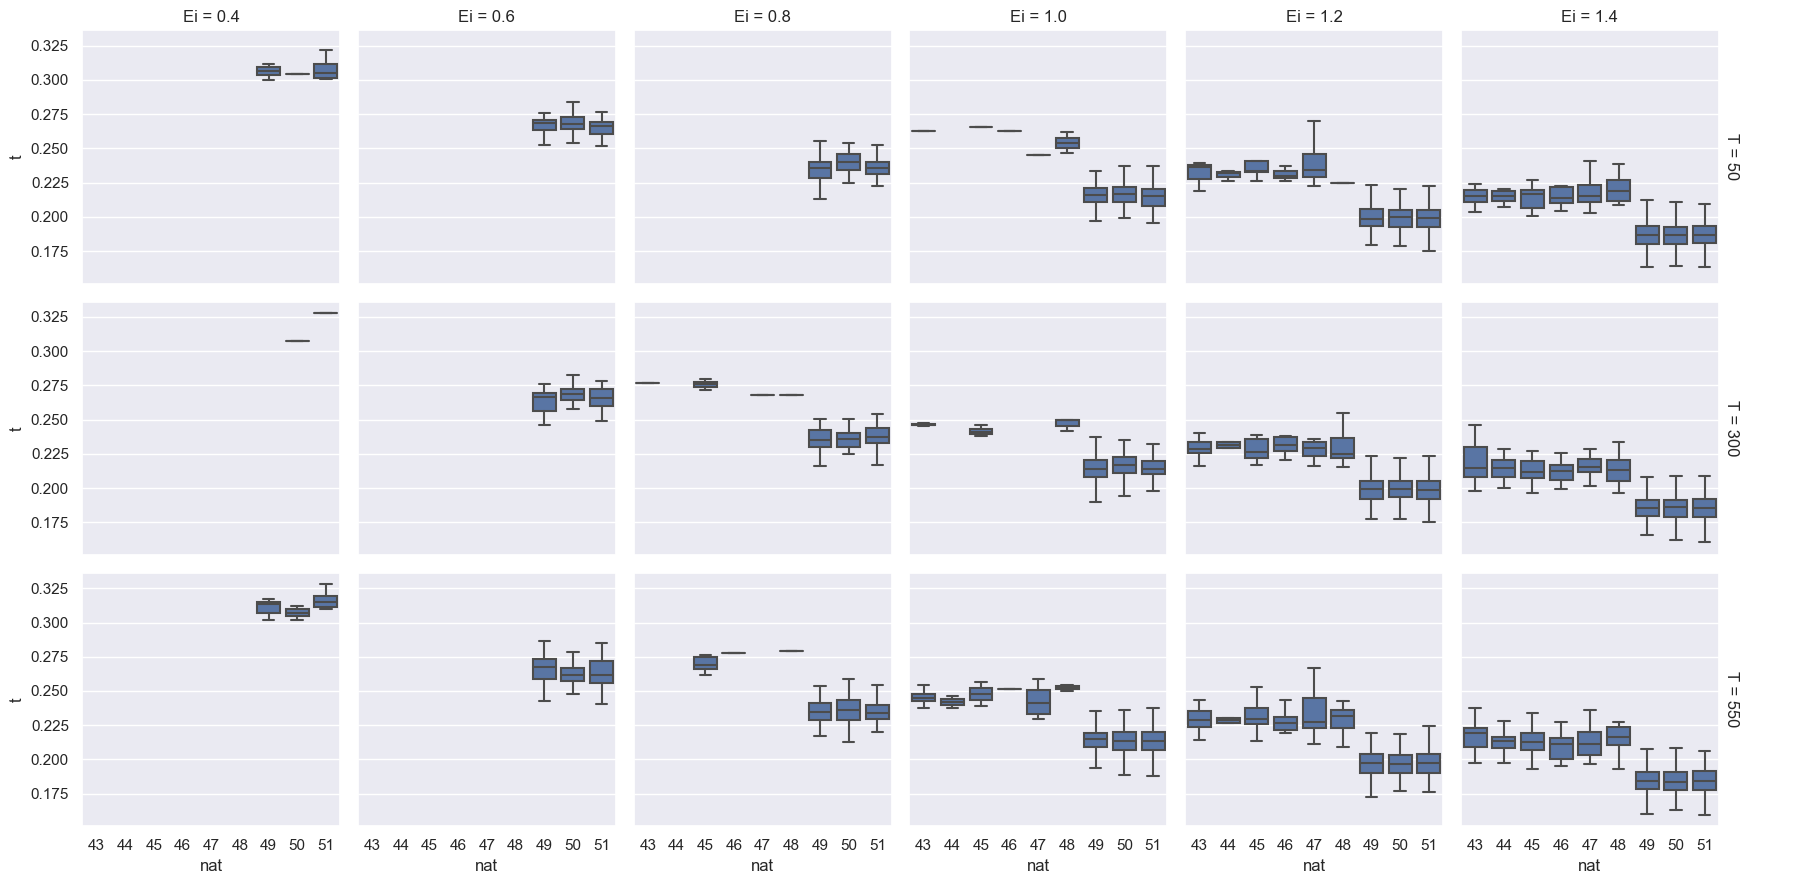

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_stick, row="T", col="Ei", margin_titles=True, despine=False)
g.map(sns.boxplot,'nat','t', sym="", order=[43,44,45,46,47,48,49,50,51]) 
g.add_legend()

In [ ]:
df_stick.nat.unique()

array([51, 49, 50, 48, 46, 43, 47, 45, 44], dtype=int64)

In [ ]:
import numpy as np

# Suponiendo que df es tu DataFrame
df_stick['capa'] = np.where((df_stick['nat'] >= 49) & (df_stick['nat'] <= 51), 'Ridge', 'Facet')
df_stick

ncoup    nt       t  nreb  nsubh  ptad         V   Ei kind_x    T   
0      2321  1510  0.3018     0      4    51  0.935684  0.4  stick   50  \
1      3384  1502  0.3002     0      4    49  1.049950  0.4  stick   50   
2      3525  1610  0.3218     1      4    51  1.337092  0.4  stick   50   
3      3611  1535  0.3068     0      1    49  1.287614  0.4  stick   50   
4      5257  1504  0.3006     0      4    51  0.955718  0.4  stick   50   
...     ...   ...     ...   ...    ...   ...       ...  ...    ...  ...   
8271   9966   998  0.1994     1      4    51  3.587370  1.4  stick  550   
8272   9980   895  0.1788     1      1    50  3.367813  1.4  stick  550   
8273   9988   907  0.1812     0      3    49  3.354040  1.4  stick  550   
8274   9993  1000  0.1998     1      2    50  2.708475  1.4  stick  550   
8275   9995   959  0.1916     1      3    49  2.726991  1.4  stick  550   

      ntraj  nat        dx        dy        dz kind_y   capa  
0      2321   51  0.075253 -0.004670  0.139315  stick  Ridge  
1      3384   49  0.027453 -0.136301  0.045059  stick  Ridge  
2      3525   51  0.017758  0.027674  0.074649  stick  Ridge  
3      3611   49 -0.008771  0.158637  0.098002  stick  Ridge  
4      5257   51 -0.025945  0.058823  0.012909  stick  Ridge  
...     ...  ...       ...       ...       ...    ...    ...  
8271   9966   51 -0.117910 -0.359715  0.122281  stick  Ridge  
8272   9980   50 -0.047303  0.277008  0.196774  stick  Ridge  
8273   9988   49 -0.001546  0.571940  0.085672  stick  Ridge  
8274   9993   50 -0.180344 -0.004562 -0.004063  stick  Ridge  
8275   9995   49 -0.044513 -0.771141  0.051879  stick  Ridge  

[8276 rows x 17 columns]

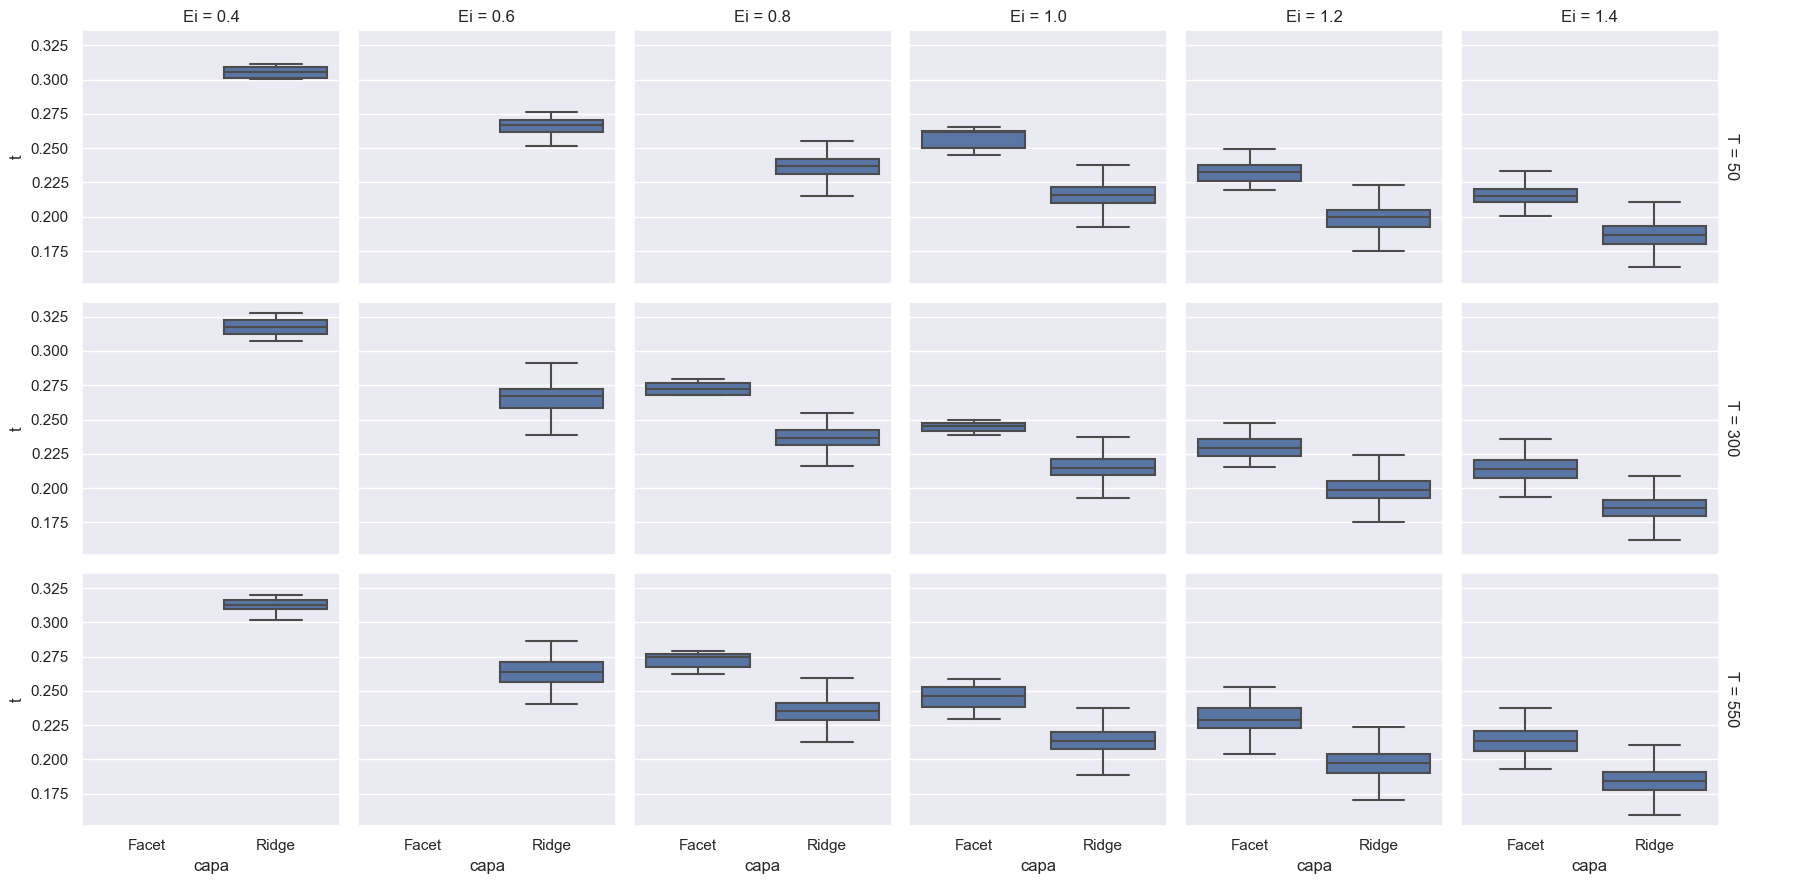

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(df_stick, row="T", col="Ei", margin_titles=True, despine=False)
g.map(sns.boxplot,'capa','t', sym="", order=['Facet','Ridge']) 
g.add_legend()

In [ ]:
df_stick.capa.unique()

array(['Ridge', 'Facet'], dtype=object)

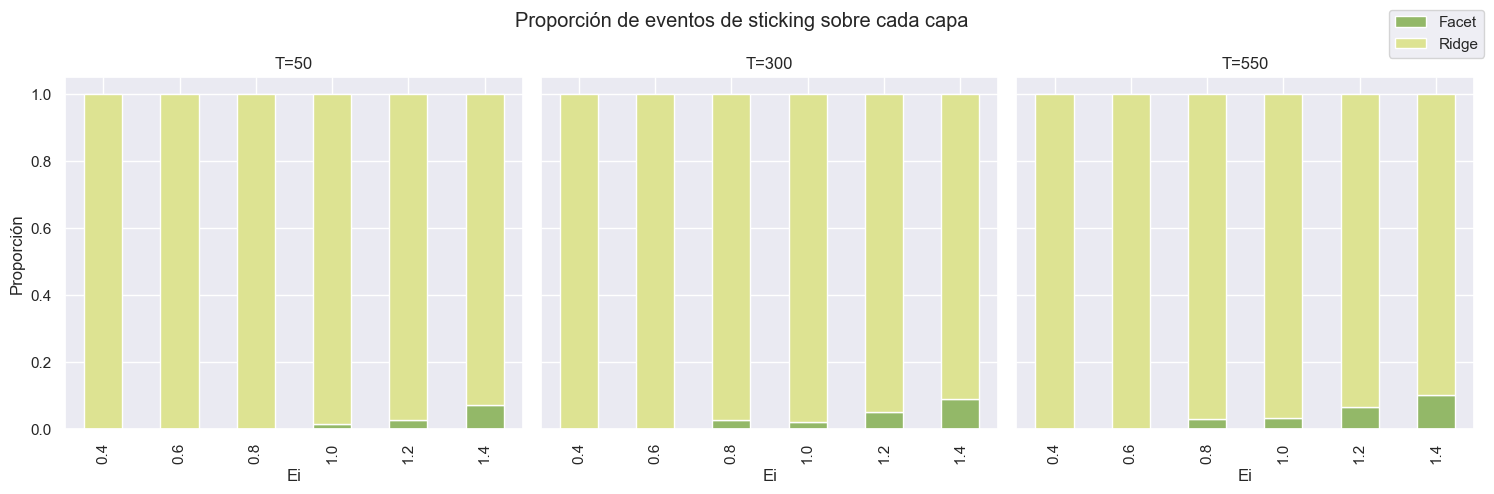

In [ ]:
df = df_stick

# Suponiendo que df es tu DataFrame
df['T'] = df['T'].astype(str)  # Convertir la columna 'T' a tipo cadena para facilitar la filtración

# Filtrar el DataFrame para cada valor de 'T'
df_T50 = df[df['T'] == '50']
df_T300 = df[df['T'] == '300']
df_T550 = df[df['T'] == '550']

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Iterar sobre los DataFrames filtrados y los ejes
for df_temp, ax, temp_label in zip([df_T50, df_T300, df_T550], axs, ['50', '300', '550']):
    grouped_df = df_temp.groupby(['Ei', 'capa']).size().unstack(fill_value=0)

    # Normalizar los datos
    grouped_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

    # Crear el gráfico de barras apiladas
    grouped_df.plot(kind='bar', stacked=True, color=[ '#93B868','#DDE392'], ax=ax, legend=False)

    # Personalizar el gráfico
    ax.set_title(f'T={temp_label}')
    ax.set_xlabel('Ei')
    ax.set_ylabel('Proporción')
    # ax.set_ylim([0, 0.2])

# Añadir leyenda
fig.legend([ 'Facet','Ridge'], bbox_to_anchor=(1,1))
fig.suptitle('Proporción de eventos de sticking sobre cada capa')
# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


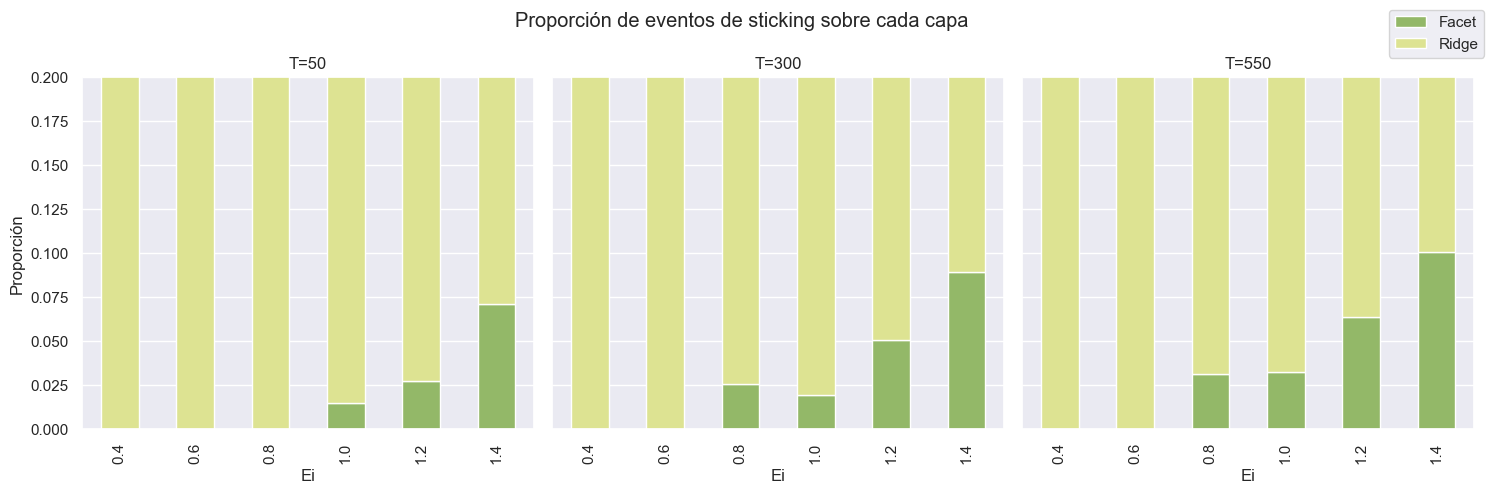

In [ ]:
df = df_stick

# Suponiendo que df es tu DataFrame
df['T'] = df['T'].astype(str)  # Convertir la columna 'T' a tipo cadena para facilitar la filtración

# Filtrar el DataFrame para cada valor de 'T'
df_T50 = df[df['T'] == '50']
df_T300 = df[df['T'] == '300']
df_T550 = df[df['T'] == '550']

# Crear subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)

# Iterar sobre los DataFrames filtrados y los ejes
for df_temp, ax, temp_label in zip([df_T50, df_T300, df_T550], axs, ['50', '300', '550']):
    grouped_df = df_temp.groupby(['Ei', 'capa']).size().unstack(fill_value=0)

    # Normalizar los datos
    grouped_df = grouped_df.div(grouped_df.sum(axis=1), axis=0)

    # Crear el gráfico de barras apiladas
    grouped_df.plot(kind='bar', stacked=True, color=[ '#93B868','#DDE392'], ax=ax, legend=False)

    # Personalizar el gráfico
    ax.set_title(f'T={temp_label}')
    ax.set_xlabel('Ei')
    ax.set_ylabel('Proporción')
    ax.set_ylim([0, 0.2])

# Añadir leyenda
fig.legend([ 'Facet','Ridge'], bbox_to_anchor=(1,1))

fig.suptitle('Proporción de eventos de sticking sobre cada capa')
# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


In [ ]:
df.head(10).to_clipboard()

In [ ]:
count_ridge = df.query('capa =="Ridge"').groupby(['T','Ei']).ncoup.agg('count')
count_ridge

T    Ei 
300  0.4       2
     0.6      66
     0.8     190
     1.0     404
     1.2     812
     1.4    1122
50   0.4       8
     0.6      70
     0.8     185
     1.0     400
     1.2     758
     1.4    1109
550  0.4      14
     0.6      71
     0.8     219
     1.0     450
     1.2     821
     1.4    1096
Name: ncoup, dtype: int64

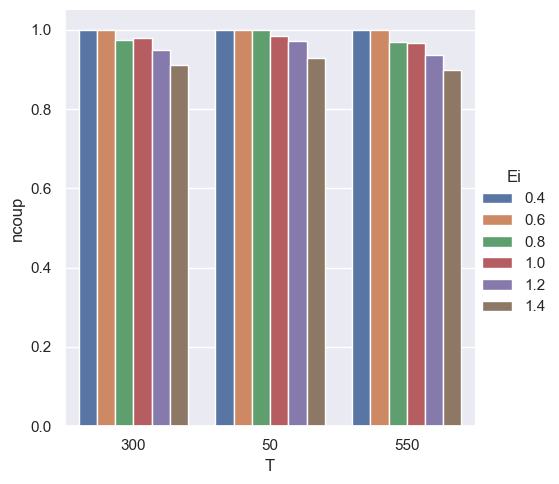

In [ ]:
count_ridge = df.query('capa =="Ridge"').groupby(['T','Ei']).ncoup.agg('count')
count = df.groupby(['T','Ei']).ncoup.agg('count')
count_ridge = count_ridge/ count
count_ridge = count_ridge.reset_index()
count_ridge.ncoup.fillna(0, inplace=True)
count_ridge

# Define the order of 'T'
t_order = ['50', '300', '550']
df['T'] = pd.Categorical(df['T'], categories=t_order, ordered=True)

sns.catplot(
    data=count_ridge,
    x = 'T',
    y='ncoup',
    hue = 'Ei',
    kind='bar'
)


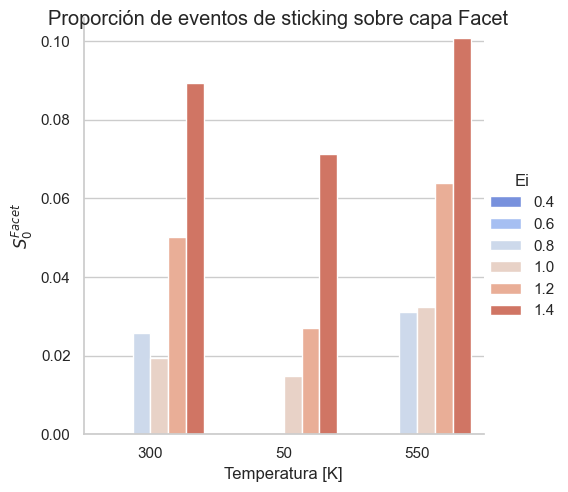

In [ ]:
count_facet = df.query('capa =="Facet"').groupby(['T','Ei']).ncoup.agg('count')
count = df.groupby(['T','Ei']).ncoup.agg('count')
count_facet = count_facet/ count
count_facet = count_facet.reset_index()
count_facet.ncoup.fillna(0, inplace=True)
count_facet

# Define the order of 'T'
t_order = ['50', '300', '550']
df['T'] = pd.Categorical(df['T'], categories=t_order, ordered=True)

 
g = sns.catplot(
    data=count_facet,
    x = 'T',
    y='ncoup',
    hue = 'Ei',
    kind='bar'
)

# Personaliza los rótulos de los ejes
g.set_axis_labels('Temperatura [K]', '$S_0^{Facet}$ ')

# Cambia los títulos de las columnas (capa)
g.set_titles(col_template="{col_name}")

plt.suptitle('Proporción de eventos de sticking sobre capa Facet')
plt.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_7240\697840230.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(
C:\Users\guill\AppData\Local\Temp\ipykernel_7240\697840230.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(
C:\Users\guill\AppData\Local\Temp\ipykernel_7240\697840230.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(


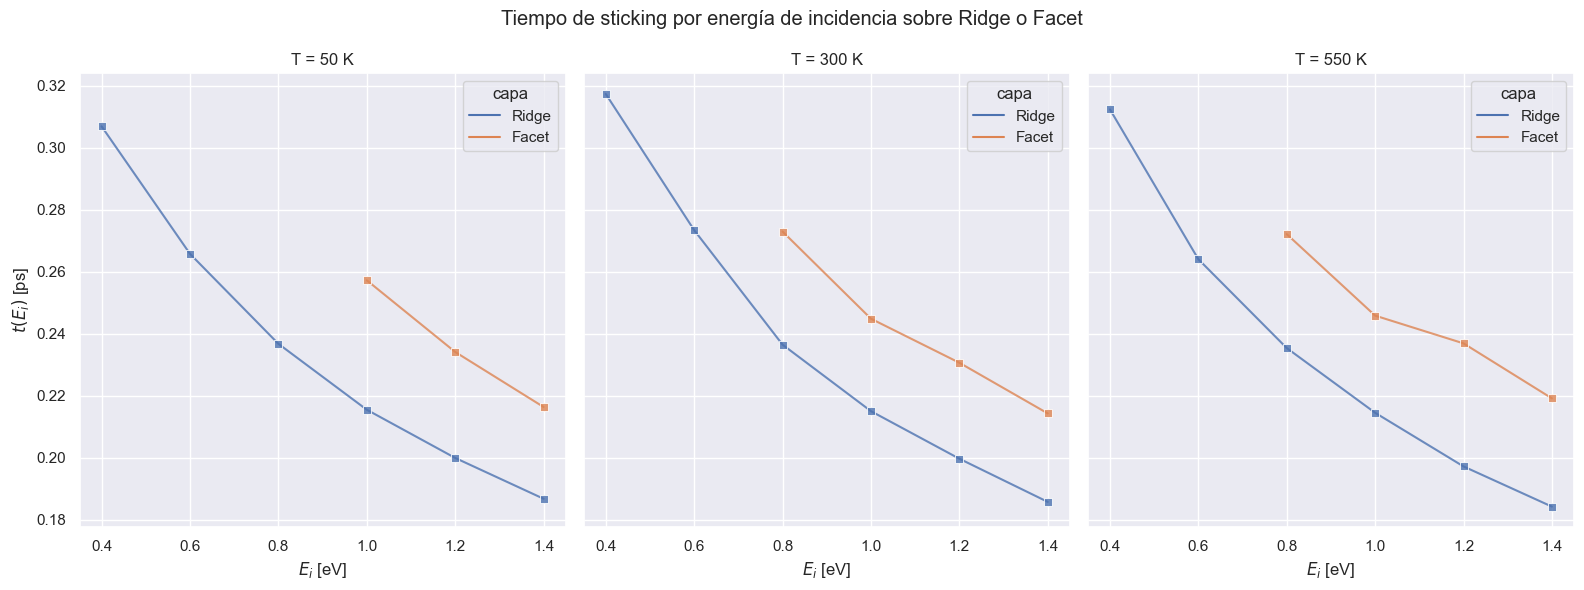

In [ ]:
fig, ax = plt.subplots(1,3,figsize =(16,6),sharey=True)
for i,T in enumerate(['50','300','550']):
    g = sns.lineplot(
        data=df.query('T == @T'),
        x='Ei',
        y='t',
        hue='capa',
        marker='s',
        alpha=0.8,
        ci=None,
        ax=ax[i]
    )
    ax[i].set_title(f'T = {T} K')
    ax[i].set_xlabel('$E_i$ [eV]')
    ax[i].set_ylabel('$t(E_i)$ [ps]')
fig.suptitle('Tiempo de sticking por energía de incidencia sobre Ridge o Facet')
fig.tight_layout()
plt.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_7240\2781364084.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(
C:\Users\guill\AppData\Local\Temp\ipykernel_7240\2781364084.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(
C:\Users\guill\AppData\Local\Temp\ipykernel_7240\2781364084.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(


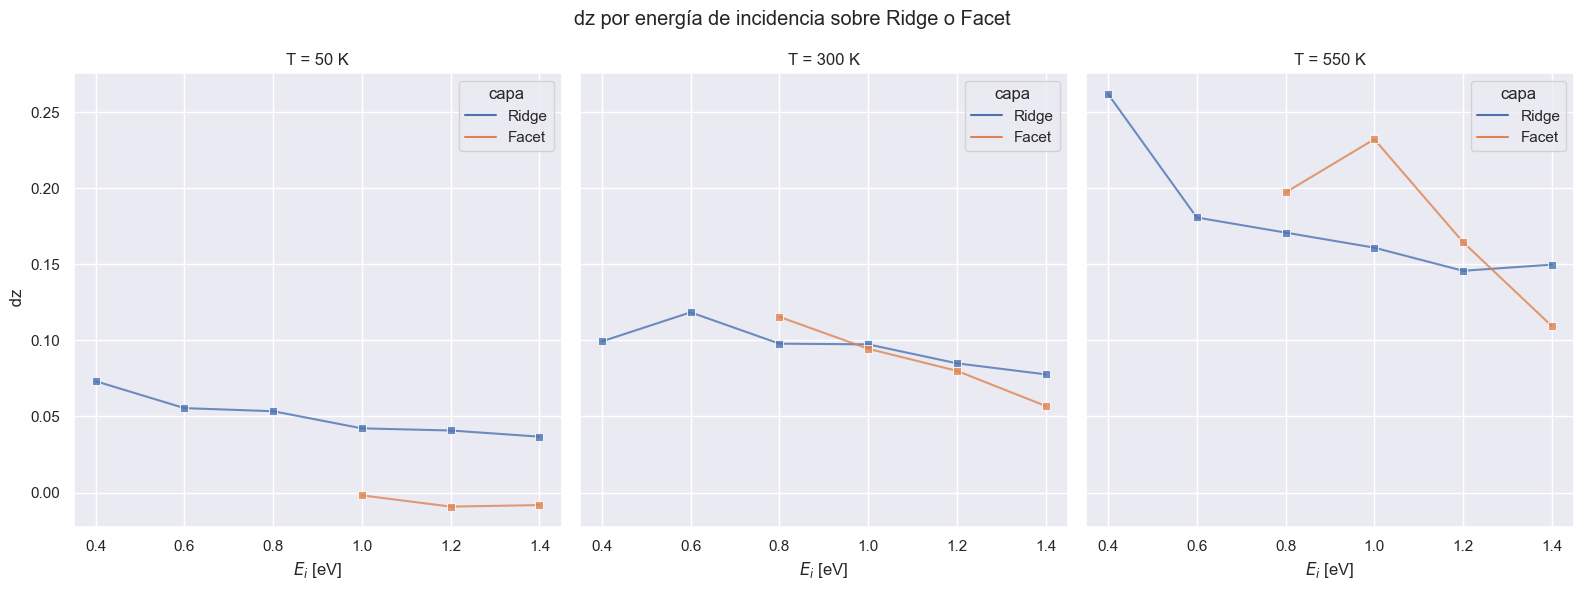

In [ ]:
fig, ax = plt.subplots(1,3,figsize =(16,6), sharey=True)
for i,T in enumerate(['50','300','550']):
    g = sns.lineplot(
        data=df.query('T == @T'),
        x='Ei',
        y='dz',
        hue='capa',
        marker='s',
        alpha=0.8,
        ci=None,
        ax=ax[i]
    )
    ax[i].set_title(f'T = {T} K')
    ax[i].set_xlabel('$E_i$ [eV]')
    ax[i].set_ylabel(' dz')
fig.suptitle('dz por energía de incidencia sobre Ridge o Facet')
fig.tight_layout()
plt.show()

C:\Users\guill\AppData\Local\Temp\ipykernel_6760\606857241.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(
C:\Users\guill\AppData\Local\Temp\ipykernel_6760\606857241.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(
C:\Users\guill\AppData\Local\Temp\ipykernel_6760\606857241.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(
C:\Users\guill\AppData\Local\Temp\ipykernel_6760\606857241.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  g = sns.lineplot(


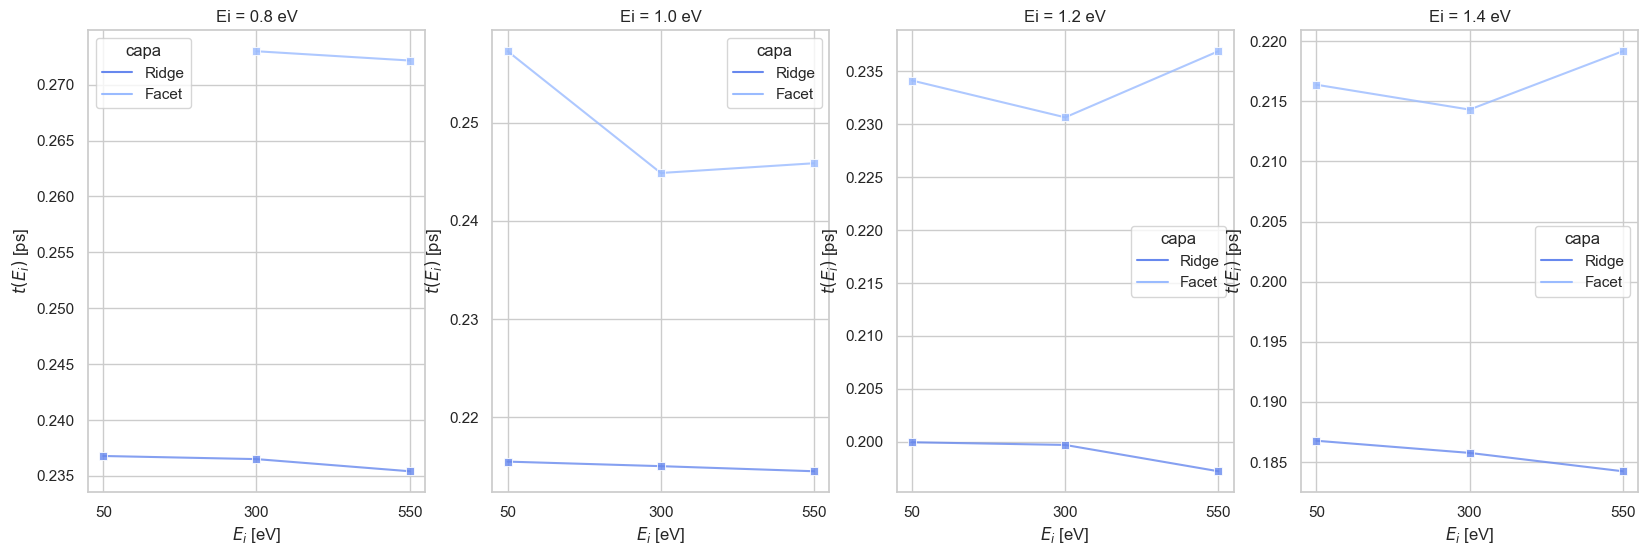

In [ ]:
fig, ax = plt.subplots(1,4,figsize =(20,6))
for i,T in enumerate(['0.8','1.0','1.2','1.4']):
    g = sns.lineplot(
        data=df.query('Ei == @T'),
        x='T',
        y='t',
        hue='capa',
        marker='s',
        alpha=0.8,
        ci=None,
        ax=ax[i]
    )
    ax[i].set_title(f'Ei = {T} eV')
    ax[i].set_xlabel('$E_i$ [eV]')
    ax[i].set_ylabel('$t(E_i)$ [ps]')
plt.show()

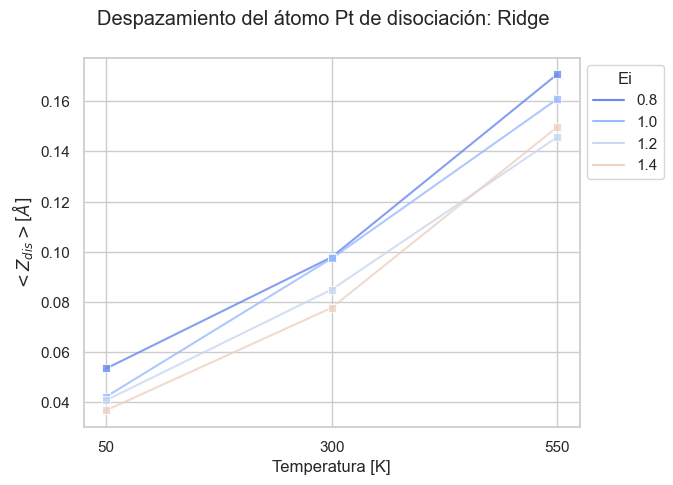

In [ ]:
g = sns.lineplot(
    data=df.query('capa =="Ridge" & Ei > "0.6"').groupby(['T','Ei'])[['dz']].agg('mean').reset_index(),
    x='T',
    y='dz',
    hue='Ei',
    marker='s',
    alpha=0.8
)

# Personaliza los rótulos de los ejes
g.set(xlabel='Temperatura [K]', ylabel='$< Z_{dis} > [\AA]$ ')

plt.suptitle('Despazamiento del átomo Pt de disociación: Ridge')
plt.legend(title='Ei',bbox_to_anchor=(1.,1))
# Muestra el gráfico
plt.show()


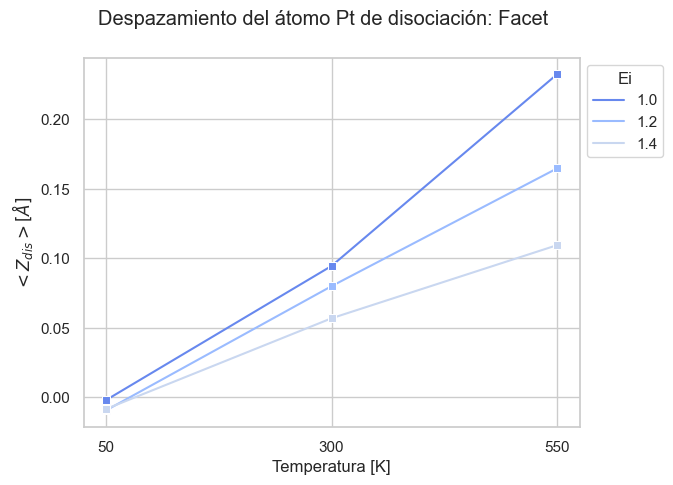

In [ ]:
g = sns.lineplot(data = df.query('capa =="Facet" & Ei >= "1.0"').groupby(['T','Ei'])[['dz']].agg('mean').reset_index(),
                x = 'T',
                y = 'dz',
                hue = 'Ei',
                marker='s'
                )
# Personaliza los rótulos de los ejes
g.set(xlabel='Temperatura [K]', ylabel='$< Z_{dis} > [\AA]$ ')

plt.suptitle('Despazamiento del átomo Pt de disociación: Facet')
plt.legend(title='Ei',bbox_to_anchor=(1,1))
# Muestra el gráfico
plt.show()


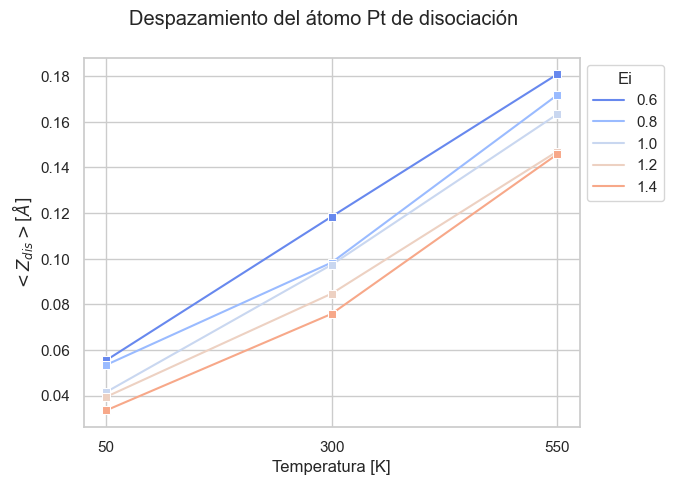

In [ ]:

g = sns.lineplot(data = df.query(' Ei > "0.4"').groupby(['T','Ei'])[['dz']].agg('mean').reset_index(),
                x = 'T',
                y = 'dz',
                hue = 'Ei',
                marker='s'
                ) 

# Personaliza los rótulos de los ejes
g.set(xlabel='Temperatura [K]', ylabel='$< Z_{dis} > [\AA]$ ')

plt.suptitle('Despazamiento del átomo Pt de disociación')
plt.legend(title='Ei',bbox_to_anchor=(1,1))
# Muestra el gráfico
plt.show()


In [ ]:
df

ncoup    nt       t  nreb  nsubh  ptad         V   Ei kind_x    T   
0      2321  1510  0.3018     0      4    51  0.935684  0.4  stick   50  \
1      3384  1502  0.3002     0      4    49  1.049950  0.4  stick   50   
2      3525  1610  0.3218     1      4    51  1.337092  0.4  stick   50   
3      3611  1535  0.3068     0      1    49  1.287614  0.4  stick   50   
4      5257  1504  0.3006     0      4    51  0.955718  0.4  stick   50   
...     ...   ...     ...   ...    ...   ...       ...  ...    ...  ...   
8271   9966   998  0.1994     1      4    51  3.587370  1.4  stick  550   
8272   9980   895  0.1788     1      1    50  3.367813  1.4  stick  550   
8273   9988   907  0.1812     0      3    49  3.354040  1.4  stick  550   
8274   9993  1000  0.1998     1      2    50  2.708475  1.4  stick  550   
8275   9995   959  0.1916     1      3    49  2.726991  1.4  stick  550   

      ntraj  nat        dx        dy        dz kind_y   capa  
0      2321   51  0.075253 -0.004670  0.139315  stick  Ridge  
1      3384   49  0.027453 -0.136301  0.045059  stick  Ridge  
2      3525   51  0.017758  0.027674  0.074649  stick  Ridge  
3      3611   49 -0.008771  0.158637  0.098002  stick  Ridge  
4      5257   51 -0.025945  0.058823  0.012909  stick  Ridge  
...     ...  ...       ...       ...       ...    ...    ...  
8271   9966   51 -0.117910 -0.359715  0.122281  stick  Ridge  
8272   9980   50 -0.047303  0.277008  0.196774  stick  Ridge  
8273   9988   49 -0.001546  0.571940  0.085672  stick  Ridge  
8274   9993   50 -0.180344 -0.004562 -0.004063  stick  Ridge  
8275   9995   49 -0.044513 -0.771141  0.051879  stick  Ridge  

[8276 rows x 17 columns]

In [ ]:
df['Ei'].astype('float')
df['V-Ei'] = df['V'] - df['Ei'].astype('float')
df

ncoup    nt       t  nreb  nsubh  ptad         V   Ei kind_x    T   
0      2321  1510  0.3018     0      4    51  0.935684  0.4  stick   50  \
1      3384  1502  0.3002     0      4    49  1.049950  0.4  stick   50   
2      3525  1610  0.3218     1      4    51  1.337092  0.4  stick   50   
3      3611  1535  0.3068     0      1    49  1.287614  0.4  stick   50   
4      5257  1504  0.3006     0      4    51  0.955718  0.4  stick   50   
...     ...   ...     ...   ...    ...   ...       ...  ...    ...  ...   
8271   9966   998  0.1994     1      4    51  3.587370  1.4  stick  550   
8272   9980   895  0.1788     1      1    50  3.367813  1.4  stick  550   
8273   9988   907  0.1812     0      3    49  3.354040  1.4  stick  550   
8274   9993  1000  0.1998     1      2    50  2.708475  1.4  stick  550   
8275   9995   959  0.1916     1      3    49  2.726991  1.4  stick  550   

      ntraj  nat        dx        dy        dz kind_y   capa      V-Ei  
0      2321   51  0.075253 -0.004670  0.139315  stick  Ridge  0.535684  
1      3384   49  0.027453 -0.136301  0.045059  stick  Ridge  0.649950  
2      3525   51  0.017758  0.027674  0.074649  stick  Ridge  0.937092  
3      3611   49 -0.008771  0.158637  0.098002  stick  Ridge  0.887614  
4      5257   51 -0.025945  0.058823  0.012909  stick  Ridge  0.555718  
...     ...  ...       ...       ...       ...    ...    ...       ...  
8271   9966   51 -0.117910 -0.359715  0.122281  stick  Ridge  2.187370  
8272   9980   50 -0.047303  0.277008  0.196774  stick  Ridge  1.967813  
8273   9988   49 -0.001546  0.571940  0.085672  stick  Ridge  1.954040  
8274   9993   50 -0.180344 -0.004562 -0.004063  stick  Ridge  1.308475  
8275   9995   49 -0.044513 -0.771141  0.051879  stick  Ridge  1.326991  

[8276 rows x 18 columns]

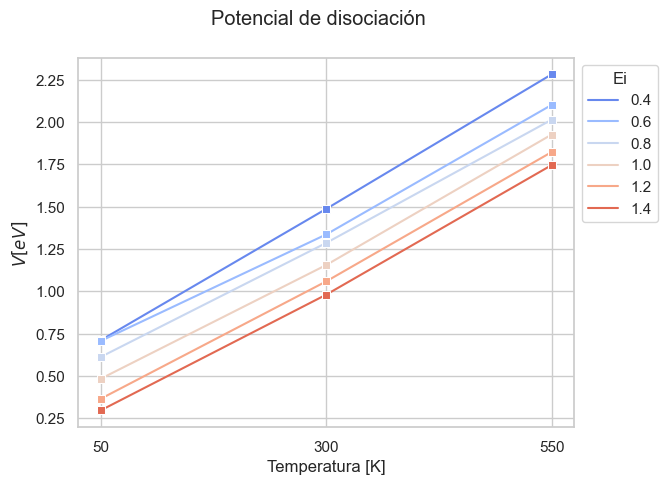

In [ ]:

g = sns.lineplot(data = df.query(' Ei >= "0.4"').groupby(['T','Ei'])[['V-Ei']].agg('mean').reset_index(),
                x = 'T',
                y = 'V-Ei',
                hue = 'Ei',
                marker='s'
                ) 

# Personaliza los rótulos de los ejes
g.set(xlabel='Temperatura [K]', ylabel='$ V  [eV]$ ')

plt.suptitle('Potencial de disociación')
plt.legend(title='Ei',bbox_to_anchor=(1,1))
# Muestra el gráfico
plt.show()


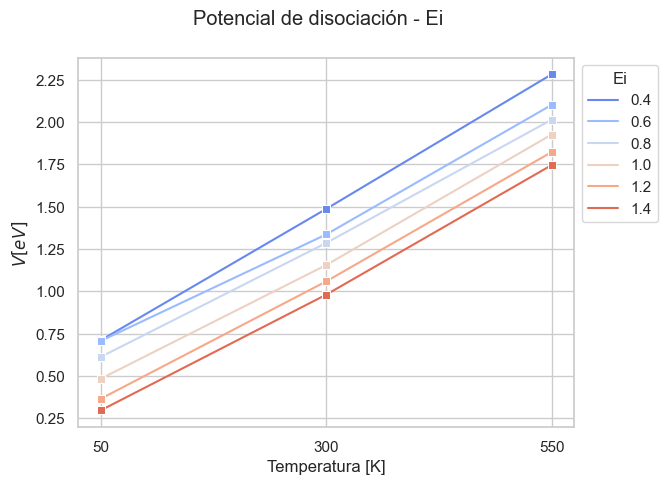

In [ ]:

g = sns.lineplot(data = df.query(' Ei >= "0.4"').groupby(['T','Ei'])[['V-Ei']].agg('mean').reset_index(),
                x = 'T',
                y = 'V-Ei',
                hue = 'Ei',
                marker='s'
                ) 

# Personaliza los rótulos de los ejes
g.set(xlabel='Temperatura [K]', ylabel='$ V  [eV]$ ')

plt.suptitle('Potencial de disociación - Ei')
plt.legend(title='Ei',bbox_to_anchor=(1,1))
# Muestra el gráfico
plt.show()


In [ ]:

g = sns.lineplot(data = df.query(' Ei > "0.4"').groupby(['T','Ei'])[['dz']].agg('mean').reset_index(),
                x = 'T',
                y = 'dz',
                hue = 'Ei',
                marker='s'
                ) 

# Personaliza los rótulos de los ejes
g.set(xlabel='Temperatura [K]', ylabel='$< Z_{dis} > [\AA]$ ')

plt.suptitle('Despazamiento del átomo Pt de disociación')
plt.legend(title='Ei',bbox_to_anchor=(1,1))
# Muestra el gráfico
plt.show()


KeyError: "Columns not found: 'dz'"

# Refl

In [ ]:
df2 = trajs_all_refl.copy()
df2

ncoup    nt       t  nreb         V  tlf   Ei  kind    T
0           6  3601  0.7200     1  0.800568  0.0  0.4  refl   50
1          13  3286  0.6570     1  0.370135  0.0  0.4  refl   50
2          20  4315  0.8628     1  0.826881  0.0  0.4  refl   50
3          31  3699  0.7396     1  0.832096  0.0  0.4  refl   50
4          48  3612  0.7222     1  0.715993  0.0  0.4  refl   50
...       ...   ...     ...   ...       ...  ...  ...   ...  ...
103436   9996  3121  0.6240     1  2.533393  0.0  1.4  refl  550
103437   9997  2576  0.5150     1  2.120063  0.0  1.4  refl  550
103438   9998  2359  0.4716     1  2.219581  0.0  1.4  refl  550
103439   9999  2075  0.4148     1  2.405981  0.0  1.4  refl  550
103440  10000  2560  0.5118     1  2.620518  0.0  1.4  refl  550

[103441 rows x 9 columns]

In [ ]:
df2.query('nreb>1').value_counts().reset_index()

ncoup    nt       t  nreb         V     tlf   Ei  kind    T  count
0         1  4145  0.8288     2  1.455969  0.3584  1.4  refl  300      1
1      6671  4985  0.9968     2  1.184718  0.3996  1.2  refl   50      1
2      6709  4812  0.9622     2  1.163026  0.3738  1.0  refl   50      1
3      6709  4258  0.8514     2  0.634374  0.3494  1.2  refl   50      1
4      6709  4028  0.8054     2  1.108092  0.3268  1.4  refl   50      1
...     ...   ...     ...   ...       ...     ...  ...   ...  ...    ...
1504   3404  4801  0.9600     2  1.636791  0.1106  0.6  refl  300      1
1505   3385  4751  0.9500     2  2.751108  0.1624  0.4  refl  550      1
1506   3381  4256  0.8510     2  2.185889  0.1064  0.6  refl  550      1
1507   3381  3745  0.7488     2  2.310276  0.1176  0.8  refl  550      1
1508  10923  4850  0.9698     2  2.048168  0.4072  1.2  refl  300      1

[1509 rows x 10 columns]

In [ ]:
df2.query('nreb>1').groupby(['T','Ei'])['ncoup'].agg('count').reset_index()

T   Ei  ncoup
0    50  0.4      0
1    50  0.6      0
2    50  0.8      0
3    50  1.0      0
4    50  1.2      0
5    50  1.4      0
6   300  0.4      0
7   300  0.6      0
8   300  0.8      0
9   300  1.0      0
10  300  1.2      0
11  300  1.4      0
12  550  0.4      0
13  550  0.6      0
14  550  0.8      0
15  550  1.0      0
16  550  1.2      0
17  550  1.4      0

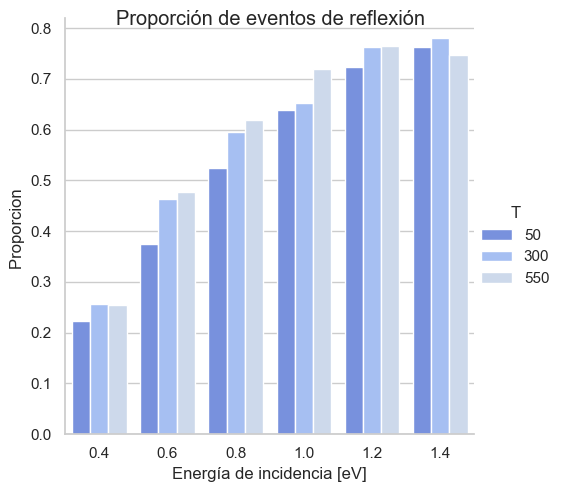

In [ ]:
# df2.query('nreb>1').groupby(['T','Ei'])['ncoup'].agg('count')

count_refl = df2.groupby(['T','Ei'])['ncoup'].agg('count').reset_index()

count_refl.ncoup.fillna(0, inplace=True)
count_refl['ncoup'] = count_refl['ncoup'] /10000
count_refl

# # Define the order of 'T'
# t_order = ['50', '300', '550']
# df2['T'] = pd.Categorical(df2['T'], categories=t_order, ordered=True)

 
g = sns.catplot(
    data=count_refl,
    x = 'Ei',
    y='ncoup',
    hue = 'T',
    kind='bar'
)

# Personaliza los rótulos de los ejes
g.set_axis_labels('Energía de incidencia [eV]', 'Proporcion ')

# Cambia los títulos de las columnas (capa)
g.set_titles(col_template="{col_name}")

plt.suptitle('Proporción de eventos de reflexión')
# plt.tight_layout()
plt.show()

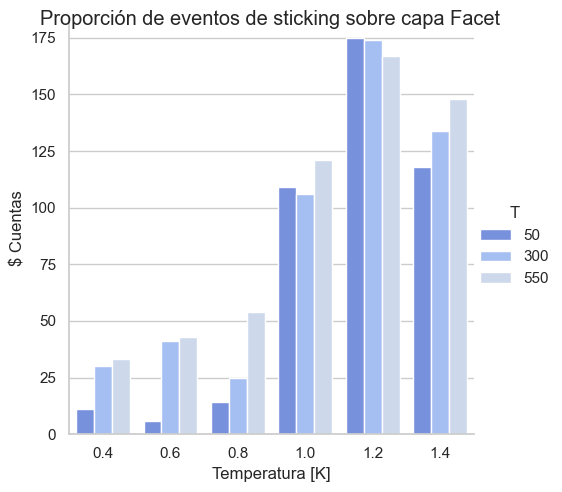

In [ ]:
# df2.query('nreb>1').groupby(['T','Ei'])['ncoup'].agg('count')

count_refl = df2.query('nreb>1').groupby(['T','Ei'])['ncoup'].agg('count').reset_index()

count_refl.ncoup.fillna(0, inplace=True)
count_refl

 
g = sns.catplot(
    data=count_refl,
    x = 'Ei',
    y='ncoup',
    hue = 'T',
    kind='bar'
)

# Personaliza los rótulos de los ejes
g.set_axis_labels('Temperatura [K]', '$ Cuentas ')

# Cambia los títulos de las columnas (capa)
g.set_titles(col_template="{col_name}")

plt.suptitle('Proporción de eventos de sticking sobre capa Facet')
plt.show()

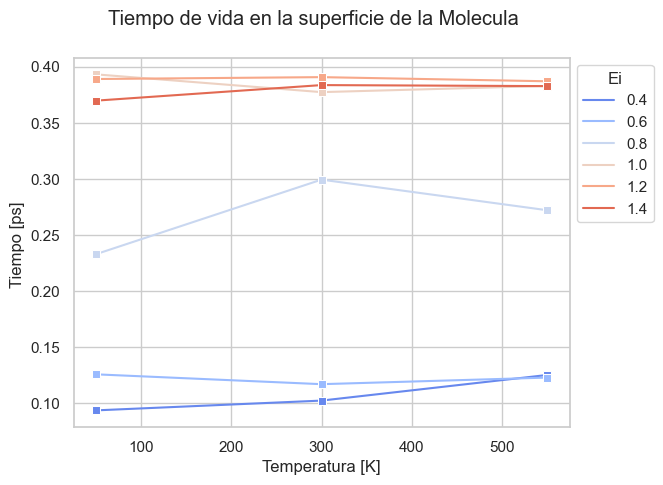

In [ ]:
df2.query('nreb>1')
g = sns.lineplot(data = df2.query('nreb>1').groupby(['T','Ei'])[['tlf']].agg('mean').reset_index(),
                x = 'T',
                y = 'tlf',
                hue = 'Ei',
                marker='s'
                ) 

# Personaliza los rótulos de los ejes
g.set(xlabel='Temperatura [K]', ylabel='Tiempo [ps] ')

plt.suptitle('Tiempo de vida en la superficie de la Molecula')
plt.legend(title='Ei',bbox_to_anchor=(1,1))
# Muestra el gráfico
plt.show()


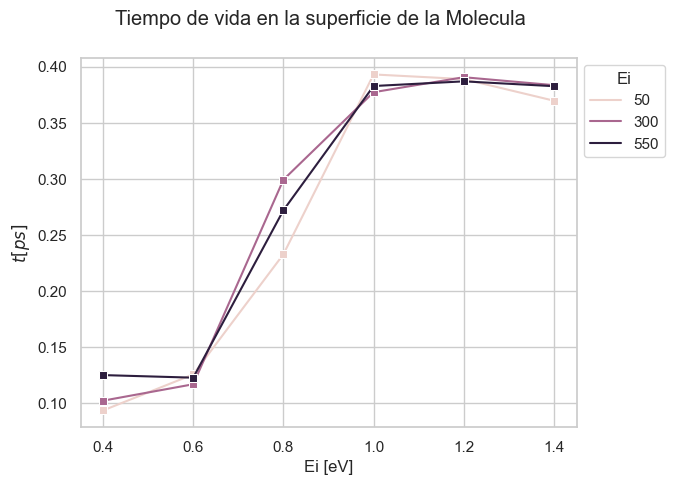

In [ ]:
df2.query('nreb>1')
g = sns.lineplot(data = df2.query('nreb>1').groupby(['T','Ei'])[['tlf']].agg('mean').reset_index(),
                x = 'Ei',
                y = 'tlf',
                hue = 'T',
                marker='s'
                ) 

# Personaliza los rótulos de los ejes
g.set(xlabel='Ei [eV]', ylabel='$ t [ps]$ ')

plt.suptitle('Tiempo de vida en la superficie de la Molecula')
plt.legend(title='Ei',bbox_to_anchor=(1,1))
# Muestra el gráfico
plt.show()


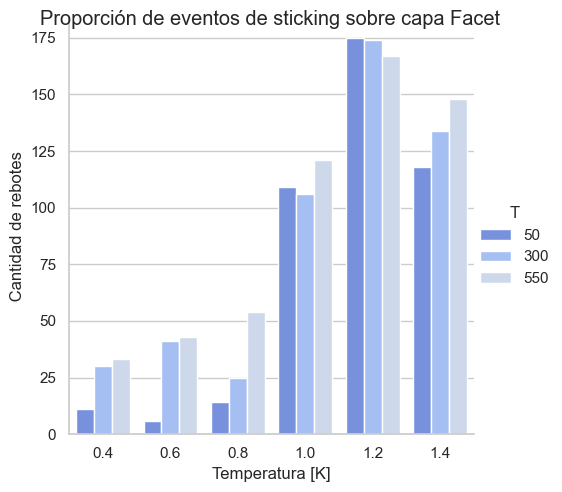

In [ ]:

count_refl = df2.query('nreb>1').groupby(['T','Ei'])['nreb'].agg('count').reset_index()
# count_refl.ncoup.fillna(0, inplace=True)
count_refl

 
g = sns.catplot(
    data=count_refl,
    x = 'Ei',
    y='nreb',
    hue = 'T',
    kind='bar'
)

# Personaliza los rótulos de los ejes
g.set_axis_labels('Temperatura [K]', ' Cantidad de rebotes ')

# Cambia los títulos de las columnas (capa)
g.set_titles(col_template="{col_name}")

plt.suptitle('Proporción de eventos de sticking sobre capa Facet')
plt.show()

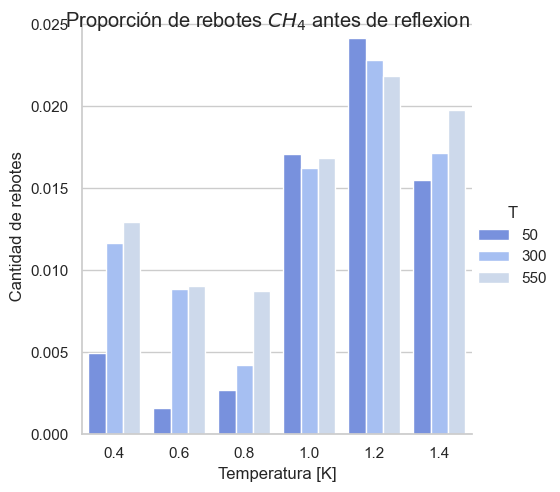

In [ ]:

count_refl = df2.query('nreb>1').groupby(['T','Ei'])['nreb'].agg('count') 
count_refl =count_refl / df2.groupby(['T','Ei'])['ncoup'].agg('count')
count_refl = count_refl.reset_index()
 
g = sns.catplot(
    data=count_refl,
    x = 'Ei',
    y=0,
    hue = 'T',
    kind='bar'
)

# Personaliza los rótulos de los ejes
g.set_axis_labels('Temperatura [K]', ' Cantidad de rebotes ')

# Cambia los títulos de las columnas (capa)
g.set_titles(col_template="{col_name}")

plt.suptitle('Proporción de rebotes $CH_4$ antes de reflexion')
plt.show()